# Andrés Melgarejo - 202012655
# Proyecto Computacional 2023-1
# Análisis de espectros estelares
A lo largo de este notebook se van a implementar los códigos básicos de Iraf en python. Esto con el objetivo de hacer más llevadero el análisis de las imágenes y los datos, además, para usar una herramienta más actualizada, poderosa y ampliamente utilizada.

In [ ]:
!pip install --upgrade astropy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: astropy
    Found existing installation: astropy 5.3.4
    Uninstalling astropy-5.3.4:
      Successfully uninstalled astropy-5.3.4


In [ ]:
!pip install ccdproc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.2 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=68ad3bdd9e2ba22dc67666c1bafb26c108212602a47d6e811cb046537471bf53
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [ ]:
!pip install convenience_functions

ERROR: Could not find a version that satisfies the requirement convenience_functions (from versions: none)
ERROR: No matching distribution found for convenience_functions


In [ ]:
pip install py_spec

In [ ]:
pip install PyAstronomy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.0/775.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 15.3 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.21.0-py3-none-any.whl size=551636 sha256=5a17c3113da08748ecb40064476b6ce441d37db1b9c9fd67d349bc622a1146b0
  Stored in directory: /root/.cache/pip/wheels/af/0d/17/fd077134497d5853ed7e740e10f9b9a2b7712f4468911d6a07
Successfully built PyAstronomy


In [ ]:
#Librerias y paquetes
#astronomy
from glob import glob
from astropy.io import fits
import astropy

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pandas as pd

# statistics
from astropy.stats import biweight_location, biweight_scale, sigma_clipped_stats
from scipy.stats import median_abs_deviation

#data reading
import imghdr
from PIL import Image
import io

from pathlib import Path
import os
from astropy.nddata import CCDData
from astropy.stats import mad_std
#
from astropy import units as u
from pathlib import Path
from astropy.wcs import WCS

from scipy.stats import lognorm
from matplotlib.colors import LogNorm

from astropy.modeling import models, fitting
from scipy.signal import savgol_filter

from scipy.signal import argrelextrema
from scipy.optimize import curve_fit


In [ ]:
#Conexión del Notebook con la carpeta de archivos

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Entendiendo nuestros datos

In [ ]:
#determinar que tipo de información contiene cada imagen

files = glob("/content/drive/MyDrive/Proyecto Computacional/data/*.fits")
files

['/content/drive/MyDrive/Proyecto Computacional/data/sp0020.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0024.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0009.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0016.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0012.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0023.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0018.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0005.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0022.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0010.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0015.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0003.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0006.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0013.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0014.fi

In [ ]:
(files[0][51:])

'sp0020.fits'

In [ ]:


names=[]

for i in files:
  hdul = fits.open(i)
  data = hdul[0].data
  h1 = hdul[0].header
  names.append(h1.get('OBJECT', 'Unknown'))

In [ ]:
#Diccionario con las llaves de cada imagen y su tipo

image_type= {}
for i in range(len(names)):
  image_type[files[i][51:]] = names[i]
image_type

{'sp0020.fits': 'DHCep 6707',
 'sp0024.fits': 'AHCep 6707',
 'sp0009.fits': 'biases 1st afternoon',
 'sp0016.fits': 'flats-6707',
 'sp0012.fits': 'more twilight sky',
 'sp0023.fits': 'AHCep 6707',
 'sp0018.fits': 'comp 6707 start of night',
 'sp0005.fits': 'biases 1st afternoon',
 'sp0022.fits': 'DHCep 6707',
 'sp0010.fits': 'biases 1st afternoon',
 'sp0015.fits': 'flats-6707',
 'sp0003.fits': 'biases 1st afternoon',
 'sp0006.fits': 'biases 1st afternoon',
 'sp0013.fits': 'more twilight sky',
 'sp0014.fits': 'flats-6707',
 'sp0002.fits': 'biases 1st afternoon',
 'sp0011.fits': 'twilight sky',
 'sp0017.fits': 'flats-6707',
 'sp0007.fits': 'biases 1st afternoon',
 'sp0027.fits': 'comp 6707',
 'sp0021.fits': 'DHCep 6707',
 'sp0025.fits': 'AHCep 6707',
 'sp0001.fits': 'biases 1st afternoon',
 'sp0008.fits': 'biases 1st afternoon',
 'sp0004.fits': 'biases 1st afternoon',
 'bias_master.fits': 'Unknown',
 'flats_master.fits': 'Unknown',
 'sky_flats_master.fits': 'Unknown'}

In [ ]:

types=[]
for i in files:
  hdul = fits.open(i)
  data = hdul[0].data
  h1 = hdul[0].header
  types.append(h1.get('IMAGETYP', 'Unknown'))
types

['object',
 'object',
 'zero',
 'flat',
 'object',
 'object',
 'comp',
 'zero',
 'object',
 'zero',
 'flat',
 'zero',
 'zero',
 'object',
 'flat',
 'zero',
 'object',
 'flat',
 'zero',
 'comp',
 'object',
 'object',
 'zero',
 'zero',
 'zero',
 'Unknown',
 'Unknown',
 'Unknown']

In [ ]:
img_ty={}
for i in range(len(names)):
  img_ty[files[i][51:]] = types[i]
img_ty


{'sp0020.fits': 'object',
 'sp0024.fits': 'object',
 'sp0009.fits': 'zero',
 'sp0016.fits': 'flat',
 'sp0012.fits': 'object',
 'sp0023.fits': 'object',
 'sp0018.fits': 'comp',
 'sp0005.fits': 'zero',
 'sp0022.fits': 'object',
 'sp0010.fits': 'zero',
 'sp0015.fits': 'flat',
 'sp0003.fits': 'zero',
 'sp0006.fits': 'zero',
 'sp0013.fits': 'object',
 'sp0014.fits': 'flat',
 'sp0002.fits': 'zero',
 'sp0011.fits': 'object',
 'sp0017.fits': 'flat',
 'sp0007.fits': 'zero',
 'sp0027.fits': 'comp',
 'sp0021.fits': 'object',
 'sp0025.fits': 'object',
 'sp0001.fits': 'zero',
 'sp0008.fits': 'zero',
 'sp0004.fits': 'zero',
 'bias_master.fits': 'Unknown',
 'flats_master.fits': 'Unknown',
 'sky_flats_master.fits': 'Unknown'}

# Reducción de imágenes a partir de los bias y flats

Para la calibración de nuestros espectros se deben seguir una serie de pasos especificados en el tutorial de IRAF. El objetivo de esta sección es implementar los algoritmos propios de IRAF en Python para realizar la calibración completa en este lenguaje de programación. Los pasos a seguir según el tutorial guía son:

**Paso 1: Combinar los 10 BIAS en un solo frame**

La combinación se hace con el propósito de obtener un bias master que tenga menos ruido de lectura que los bias individuales. Puede verse más a fondo el proceso realizado acá:
  - https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/02-04-Combine-bias-images-to-make-master.html

Para esto se usa la función ZEROCOMBINE de IRAF, que recibe los siguientes parámetros:

cl> lpar zerocombine
        
        
        
        
        input =                 List of zero level images to combine
      (output = "Zero")         Output zero level name
     (combine = "average")      Type of combine operation
      (reject = "minmax")       Type of rejection
     (ccdtype = "zero")         CCD image type to combine
     (process = no)             Process images before combining?
      (delete = no)             Delete input images after combining?
     (clobber = no)             Clobber existing output image?
       (scale = "none")         Image scaling
     (statsec = "")             Image section for computing statistics
        (nlow = 0)              minmax: Number of low pixels to reject
       (nhigh = 1)              minmax: Number of high pixels to reject
       (nkeep = 1)              Minimum to keep (pos) or maximum to reject (neg
       (mclip = yes)            Use median in sigma clipping algorithms?
      (lsigma = 3.)             Lower sigma clipping factor
      (hsigma = 3.)             Upper sigma clipping factor
     (rdnoise = "0.")           ccdclip: CCD readout noise (electrons)
        (gain = "1.")           ccdclip: CCD gain (electrons/DN)
      (snoise = "0.")           ccdclip: Sensitivity noise (fraction)
       (pclip = -0.5)           pclip: Percentile clipping parameter
       (blank = 0.)             Value if there are no pixels
        (mode = "ql")      

En esta sección se verá como se implementa la lógica de esta función en Python para obtener la imagen BIAS a usar



In [ ]:
# Sacamos los 10 bias aparte

bias_paths=[]
for i in range(len(types)):
  if types[i] == 'zero':
    bias_paths.append(files[i])
bias_paths
#En este caso bias son las rutas a las imágenes bias de calibración, ahora se deben extraer sus datos para trabajar

['/content/drive/MyDrive/Proyecto Computacional/data/sp0009.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0005.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0010.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0003.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0006.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0002.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0007.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0001.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0008.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0004.fits']

In [ ]:
import ccdproc

In [ ]:
# Matriz con los datos para las imágenes bias
bias_ccd_list=[]
for bias_path in bias_paths:
    hdul = fits.open(bias_path)
    bias_data = hdul[0].data
    bias_unit = u.adu
    # Crear un objeto CCDData para la imagen bias
    bias_ccd = ccdproc.CCDData(data=bias_data, unit=bias_unit)
    bias_ccd_list.append(bias_ccd)

In [ ]:
# Este bloque de código es el análogo al zeroadjust de IRAF, la única diferencia es que no se omiten los valore mas altos de píxel

combined_bias = ccdproc.combine(bias_ccd_list, method='average',
                                sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                                sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std, mem_limit=350e6)

combined_bias.meta['combined'] = True

# rutas
calibrated_path = Path('/content/drive/MyDrive/Proyecto Computacional/data')
combined_bias.write(calibrated_path / 'bias_master.fits', overwrite=True)


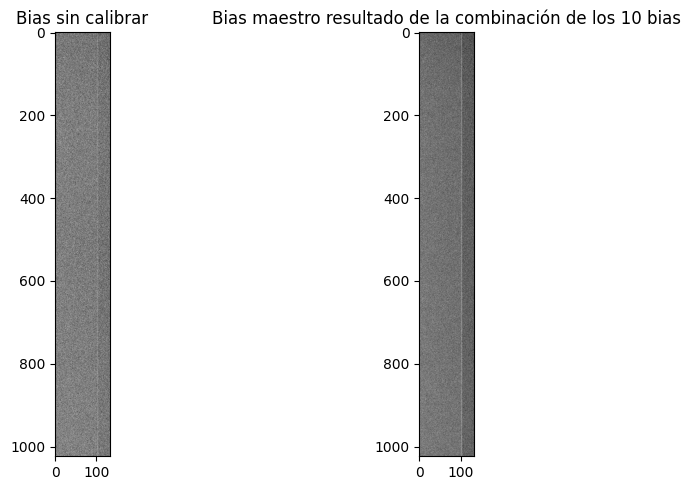

In [ ]:
#mostramos el bias calibrado

bias_=  '/content/drive/MyDrive/Proyecto Computacional/data/sp0001.fits'
hdul = fits.open(bias_)
data1 = hdul[0].data
h0 = hdul[0].header

bias_calibrado=  '/content/drive/MyDrive/Proyecto Computacional/data/bias_master.fits'
hdul = fits.open(bias_calibrado)
data = hdul[0].data
h1 = hdul[0].header

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(data1, cmap='gray',norm=LogNorm())
ax1.set_title('Bias sin calibrar')

ax2.imshow(data, cmap='gray',norm=LogNorm())
ax2.set_title('Bias maestro resultado de la combinación de los 10 bias')


plt.tight_layout()
plt.show()

**Paso 2: Determinar el overscan y los parametros de recorte para los datos**

Para saber esto es necesario ver una imagen flats

101


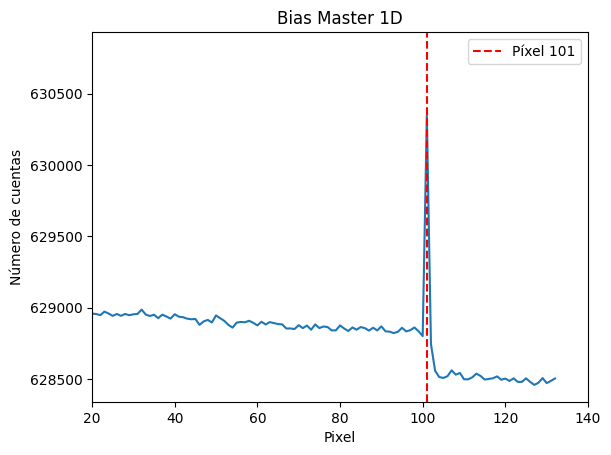

In [ ]:
#Overscan
hdul = fits.open(bias_calibrado)
data_bias_master = hdul[0].data


bias_master_1D = np.sum(data_bias_master, axis=0)
maximo= np.max(bias_master_1D[40:120])
bias_master_1D= bias_master_1D.tolist()
pos_max= bias_master_1D.index(maximo)
print(pos_max)
# Mostrar una gráfica del espectro 1D
plt.plot(bias_master_1D)
plt.xlabel('Pixel')
plt.ylabel('Número de cuentas')

plt.axvline(x=pos_max, color='red', linestyle='--', label='Píxel 101')
plt.xlim(20,140)
plt.title('Bias Master 1D')
plt.legend()
plt.show()


Cómo se observa en el gráfico anterior aproximadamente a partir del píxel 101 empieza a decaer el número de cuentas por píxel, así que a partir de este punto empieza la zona de overscan. Lo siguiente será calcular el promedio de cuentas por píxel de la zona de overscan y restarle este número a todos los píxeles de las imágenes CCD.

In [ ]:
#Promedio de cuentas para la región de overscan

over_region= len(data[0])-pos_max #Región de overscan

sumatoria= sum(bias_master_1D[101:133])
promedio= sumatoria/over_region
promedio

628569.7388516866

1024


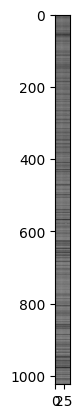

In [ ]:
flat= '/content/drive/MyDrive/Proyecto Computacional/data/sp0013.fits'
hdul = fits.open(flat)
data = hdul[0].data
h0 = hdul[0].header
print(len(data))

espec = np.sum(data.T, axis=0)
espec= espec.tolist()

fig9 = plt.figure()
plt.imshow(data, cmap='gray',norm=LogNorm())
plt.grid(False)

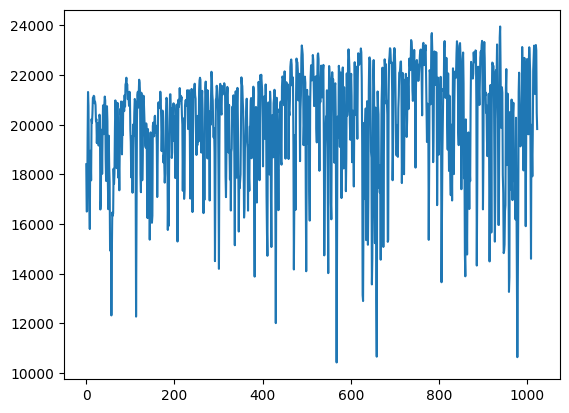

In [ ]:
plt.plot(espec)

In [ ]:
# A partir de lo nterior se establecieron los siguientes parámetros de recorte: [34,74] para las columnas y [1:1022] para las columnas

In [ ]:
# Recorte para las imágenes de los espectros de calibración y análisis:
#Las imágenes ya están recortadas en este caso, entonces esta parte es innecesaria, pero lo que se hacía era iterar sobre las imágenes y recortarlas usando operaciones de listas y matrices

for i in files:
  if i != '/content/drive/MyDrive/Proyecto Computacional/data/bias_master.fits':
    hdul = fits.open(i)
    data = hdul[0].data
    print(i)
    print(len(data))
    print(len(data[0]))
#Vemos que las 10 primeras imágenes no están cortadas, pero estas son los bias


/content/drive/MyDrive/Proyecto Computacional/data/sp0020.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0024.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0009.fits
1024
133
/content/drive/MyDrive/Proyecto Computacional/data/sp0016.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0012.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0023.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0018.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0005.fits
1024
133
/content/drive/MyDrive/Proyecto Computacional/data/sp0022.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0010.fits
1024
133
/content/drive/MyDrive/Proyecto Computacional/data/sp0015.fits
1024
41
/content/drive/MyDrive/Proyecto Computacional/data/sp0003.fits
1024
133
/content/drive/MyDrive/Proyecto Computacional/data/sp0006.fits
1024
133
/content/drive/MyDrive/Proyecto Computacional/data/sp0013.fits
1024
41
/

In [ ]:
# Quitar el overscan a cada píxel de las imágenes

In [ ]:

for i in files:
  if i != '/content/drive/MyDrive/Proyecto Computacional/data/bias_master.fits':
    hdul = fits.open(i)
    data = hdul[0].data
    spec1D= np.sum(data, axis=0) #Pasamos del espectro 2D a 1D
    print((spec1D)-promedio)
 #Al parecer las imágenes ya estaban procesadas por overscan tmb ya que me dan resultados negativos, hay que comprobar



[-627105.56 -626006.5  -626993.3  -625645.06 -627023.94 -626907.3
 -626696.4  -627051.   -626984.1  -626953.94 -626745.3  -626207.
 -625728.56 -624688.25 -622414.44 -618164.56 -607690.9  -567880.25
 -440247.   -272689.34 -228802.53 -318161.28 -483652.44 -585995.8
 -616733.56 -623982.56 -625857.5  -625865.75 -626201.6  -626007.
 -626712.6  -626815.7  -626881.9  -626867.44 -626601.6  -626950.7
 -627032.5  -627012.75 -627031.75 -626931.4  -626671.5 ]
[-625130.5   -625732.3   -626119.3   -625984.25  -626633.56  -626528.9
 -626125.2   -626189.44  -626030.5   -625396.5   -624631.25  -622838.2
 -620841.1   -617594.2   -611459.44  -595893.75  -549391.6   -388490.44
   29359.438  505655.25   589352.5    279581.88  -178434.72  -472821.94
 -582248.5   -612981.5   -621122.1   -623863.4   -625210.06  -625628.75
 -625732.56  -626120.5   -626159.75  -626230.25  -626303.2   -626211.44
 -626467.25  -626582.2   -626285.3   -626631.75  -626593.7  ]
[2423.26114831  783.26114831  666.26114831  562.26114831

In [ ]:
name= '/content/drive/MyDrive/Proyecto Computacional/data/sp0001.fits'
first_bias = CCDData.read(name, format='fits', unit='adu')

Changed DATE-OBS from '24/01/92' to '1992-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '24/01/92' to '1992-01-24''.


In [ ]:
import ccdproc as ccdp

In [ ]:
#bias_overscan_subtracted = ccdp.subtract_overscan(data, overscan=first_bias[105:130,1:1022], median=True)

#Este bloque le intentaba quitar la región de overscan a los bias

In [ ]:
#trimmed_bias = ccdp.trim_image(bias_overscan_subtracted[34:74,1:1022])

#continuación del código de la celda anterior

In [ ]:
#Los anteriores son códigos de astropy, este es un código implementado teniendo como base la tarea 'ccdproc' de IRAF:
"""
import numpy as np
from astropy.io import fits
from ccdproc import CCDData, subtract_overscan, trim_image, subtract_bias, flat_correct

def ccdproc(images, ccdtype="", max_cache=0, noproc=False, fixpix=False, overscan=True, trim=True,
            zerocor=True, darkcor=False, flatcor=False, illumcor=False, fringecor=False,
            readcor=False, scancor=False, readaxis="line", fixfile="", biassec="[105:130,1:1022]",
            trimsec="[34:74,1:1022]", zero="Zero", dark="", flat="", illum="", fringe="",
            minreplace=1.0, scantype="shortscan", nscan=1, interactive=True, function="chebyshev",
            order=1, sample="*", naverage=1, niterate=1, low_reject=3.0, high_reject=3.0,
            grow=0.0, mode="ql"):

    processed_images = []

    for image in images:
        ccd_data = CCDData.read(image, format='fits', unit='adu')


        if not noproc:
            if fixpix:
                # se implementa la lógica si es 'True' pero no es el caso
                pass

            if overscan:
                ccd_data = subtract_overscan(ccd_data, overscan_axis=1, fits_section=biassec)

            if trim:
                # Trim the image
                ccd_data = trim_image(ccd_data, fits_section=trimsec)

            if zerocor:
                # Apply zero level correction
                zero_data = CCDData.read(zero)
                ccd_data = subtract_bias(ccd_data, zero_data)

            if darkcor:
                # Apply dark count correction
                dark_data = CCDData.read(dark)
                # Implement the logic here
                pass

            if flatcor:
                # Apply flat field correction
                flat_data = CCDData.read(flat)
                pass

            if illumcor:
                illum_data = CCDData.read(illum)
                pass

            if fringecor:
                fringe_data = CCDData.read(fringe)
                pass

            if readcor:
                pass

            if scancor:
                pass

    return processed_images
img1= '/content/drive/MyDrive/Proyecto Computacional/data/sp0011.fits'
img2= '/content/drive/MyDrive/Proyecto Computacional/data/sp0014.fits'
images_to_process = [img1,img2]
processed_images = ccdproc(images=images_to_process, noproc=False, overscan=True, trim=True, zerocor=True)"""

#Este código fue un intento propio de replicar el algoritmo de IRAF para recortar las imágnes


'\nimport numpy as np\nfrom astropy.io import fits\nfrom ccdproc import CCDData, subtract_overscan, trim_image, subtract_bias, flat_correct\n\ndef ccdproc(images, ccdtype="", max_cache=0, noproc=False, fixpix=False, overscan=True, trim=True,\n            zerocor=True, darkcor=False, flatcor=False, illumcor=False, fringecor=False,\n            readcor=False, scancor=False, readaxis="line", fixfile="", biassec="[105:130,1:1022]",\n            trimsec="[34:74,1:1022]", zero="Zero", dark="", flat="", illum="", fringe="",\n            minreplace=1.0, scantype="shortscan", nscan=1, interactive=True, function="chebyshev",\n            order=1, sample="*", naverage=1, niterate=1, low_reject=3.0, high_reject=3.0,\n            grow=0.0, mode="ql"):\n\n    processed_images = []\n\n    for image in images:\n        ccd_data = CCDData.read(image, format=\'fits\', unit=\'adu\')\n\n\n        if not noproc:\n            if fixpix:\n                # se implementa la lógica si es \'True\' pero no es el

<Figure size 640x480 with 0 Axes>

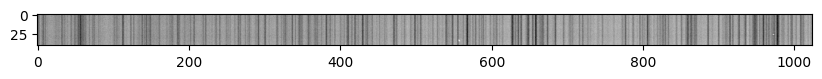

In [ ]:
espectro=  '/content/drive/MyDrive/Proyecto Computacional/data/sp0011.fits'
hdul = fits.open(espectro)
data = hdul[0].data
h0 = hdul[0].header

fig9 = plt.figure()
plt.figure(figsize=(10,5))
plt.imshow(data.T, cmap='gray',norm=LogNorm())
plt.grid(False)

**Parte 3 Combinación de los flats:**

Luego de haber procesado las imágenes se deben combinar los flats para obtener un flat maestro, con menos ruido que los flats originales. Como la parte anterior no me funcionó voy a proceder a fusionarlos san¿biendo que eso le agrega ruido a mis datos, sin embargo, quiero avanzar y ya luego arreglo el problema

In [ ]:
flats_paths=[]
for i in range(len(types)):
  if types[i] == 'flat':
    flats_paths.append(files[i])

In [ ]:
flats_paths

['/content/drive/MyDrive/Proyecto Computacional/data/sp0016.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0015.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0014.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0017.fits']

In [ ]:
import ccdproc
from ccdproc import CCDData

In [ ]:

flats_ccd_list=[]
for flat_path in flats_paths:
    hdul = fits.open(flat_path)
    flats_data = hdul[0].data
    flat_unit = u.adu

    flats_ccd = ccdproc.CCDData(data=flats_data, unit=flat_unit)
    flats_ccd_list.append(flats_ccd)

In [ ]:
len(flats_ccd_list)

4

In [ ]:

combined_flats = ccdproc.combine(flats_ccd_list, method='average',
                                sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                                sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std, mem_limit=350e6)

combined_flats.meta['combined'] = True

# rutas
calibrated_path = Path('/content/drive/MyDrive/Proyecto Computacional/data')
combined_flats.write(calibrated_path / 'flats_master.fits', overwrite=True)

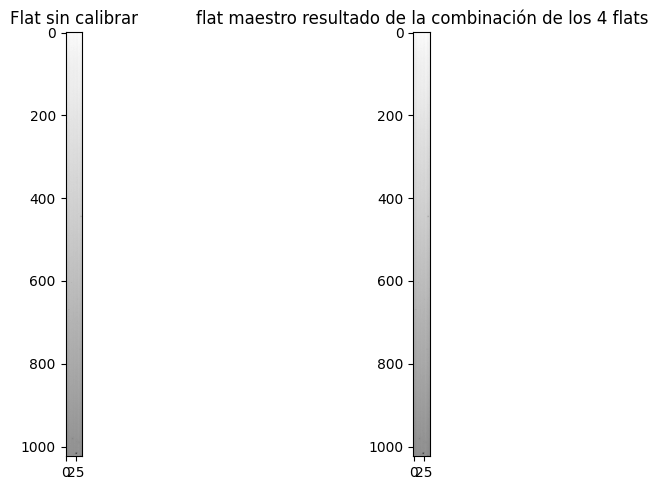

In [ ]:
flat=  '/content/drive/MyDrive/Proyecto Computacional/data/sp0014.fits'
hdul = fits.open(flat)
data1 = hdul[0].data
h0 = hdul[0].header

flat_calibrado=  '/content/drive/MyDrive/Proyecto Computacional/data/flats_master.fits'
hdul = fits.open(flat_calibrado)
data = hdul[0].data
h1 = hdul[0].header

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(data1, cmap='gray',norm=LogNorm())
ax1.set_title('Flat sin calibrar')

ax2.imshow(data, cmap='gray',norm=LogNorm())
ax2.set_title('flat maestro resultado de la combinación de los 4 flats')


plt.tight_layout()
plt.show()

**Parte 4 procesar los sky flats, objetos y comps (Eliminar el overscan, recorte y zero correction):**

En esta parte se van a aplicar las correciones bias, flats y overscan a las imágenes a analizar.


Normalized FlatField:

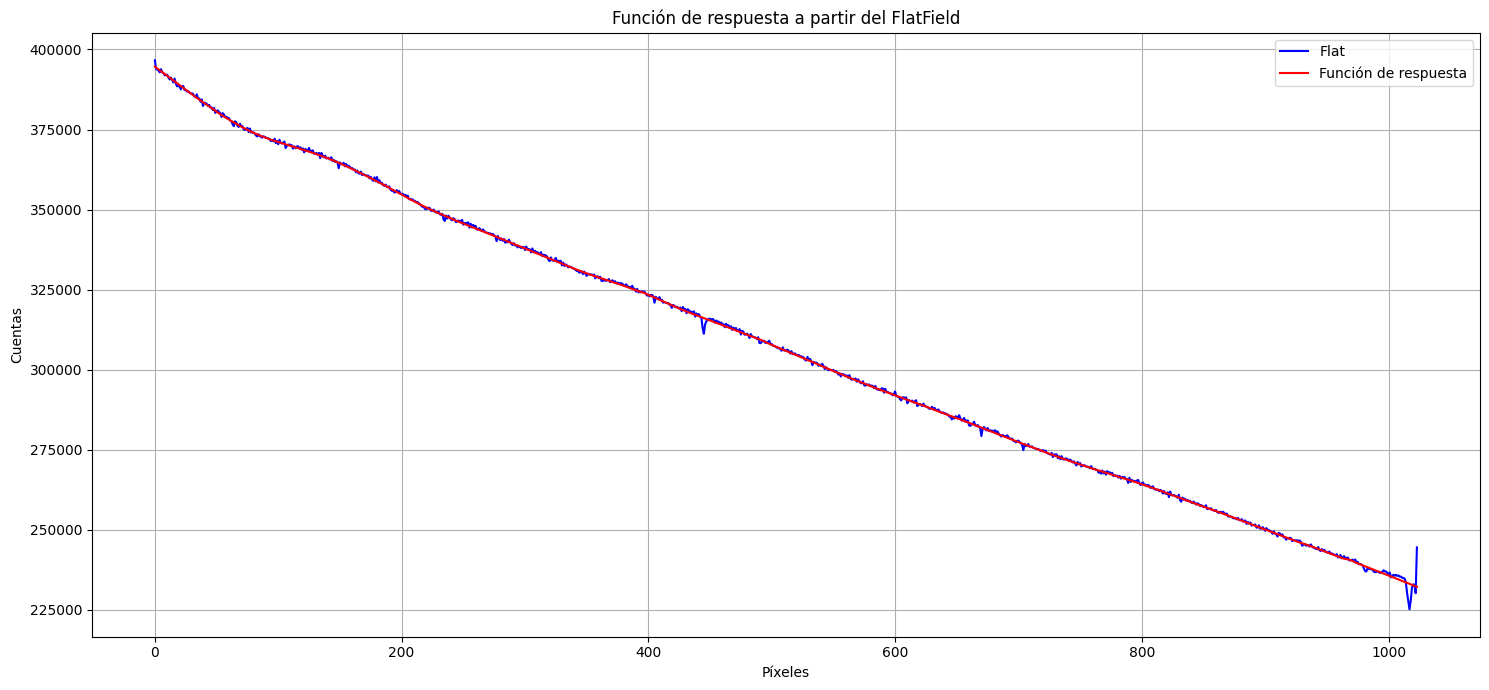

In [ ]:
#Se usa el flat master:

hdul = fits.open(flat_calibrado)
data = hdul[0].data

flat_calibrado_1D= np.sum(data.T, axis=0)
flat_calibrado_1D= flat_calibrado_1D.tolist()

#Linea de ajuste:
continuo_fit = savgol_filter(flat_calibrado_1D, 100, 3)

#Cálculo de la función de respuesta:
#Se divide entre cada columna del flat de entrada

funcion_respuesta= continuo_fit/flat_calibrado_1D

plt.figure(figsize=(15, 7))
plt.plot(flat_calibrado_1D, label='Flat', color='blue')
plt.plot(continuo_fit, label='Función de respuesta', color='red')
plt.xlabel('Píxeles')
plt.ylabel('Cuentas')
plt.title('Función de respuesta a partir del FlatField')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Inspección y corrección de los SkyFlats

In [ ]:

sky_flats_paths=[]
for i in range(len(names)):
  if names[i] == 'more twilight sky' or names[i] == 'twilight sky':
    sky_flats_paths.append(files[i])

sky_flats_paths

['/content/drive/MyDrive/Proyecto Computacional/data/sp0012.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0013.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0011.fits']

In [ ]:
# Combinación de los SkyFlats


sky_flats_ccd_list=[]
for flat_path in sky_flats_paths:
    hdul = fits.open(flat_path)
    flats_data = hdul[0].data
    flat_unit = u.adu

    flats_ccd = ccdproc.CCDData(data=flats_data, unit=flat_unit)
    sky_flats_ccd_list.append(flats_ccd)


combined_sky_flats = ccdproc.combine(sky_flats_ccd_list, method='average',
                                sigma_clip=False)

combined_sky_flats.meta['combined'] = True

# rutas
calibrated_path = Path('/content/drive/MyDrive/Proyecto Computacional/data')
combined_sky_flats.write(calibrated_path / 'sky_flats_master.fits', overwrite=True)

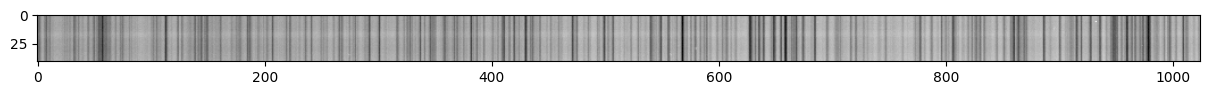

In [ ]:

flat_calibrado=  '/content/drive/MyDrive/Proyecto Computacional/data/sky_flats_master.fits'
hdul = fits.open(flat_calibrado)
data = hdul[0].data
h1 = hdul[0].header

fig9 = plt.figure(figsize=(15,10))
plt.imshow(data.T, cmap='gray',norm=LogNorm())
plt.grid(False)

# **Calibración en Longitud de Onda**

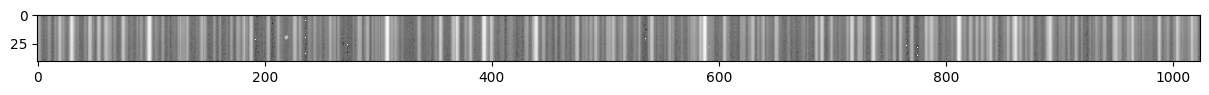

In [ ]:
# Usamos el espectro de la lámpara de calibración: sp0018.fits 'comp 6707 start of night',

lampara=  '/content/drive/MyDrive/Proyecto Computacional/data/sp0027.fits'
hdul = fits.open(lampara)
data = hdul[0].data
h1 = hdul[0].header

fig9 = plt.figure(figsize=(15,10))
plt.imshow(data.T, cmap='gray',norm=LogNorm())
plt.grid(False)

In [ ]:
h1

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   41 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2014-09-09T20:15:05' / Date FITS file was generated                  
IRAF-TLM= '2014-09-09T20:15:05' / Time of last modification                     
OBJECT  = 'comp 6707'          / Name of the object observed                    
IRAF-MAX=           2.848000E4  /  DATA MAX                                     
IRAF-MIN=           6.080000E2  /  DATA MIN                                     
OBSERVAT= 'KPNO             

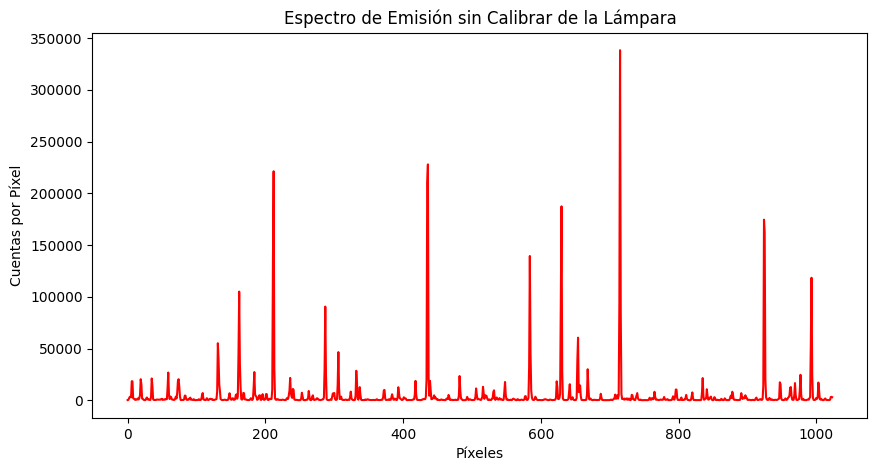

In [ ]:
# En 1D:

lampara1D= np.sum(data, axis=1)


plt.figure(figsize=(10, 5))
plt.xlabel("Píxeles")
plt.ylabel("Cuentas por Píxel")
plt.title("Espectro de Emisión sin Calibrar de la Lámpara")
plt.plot(np.flip(lampara1D), label='Lámpara de Calibración', color='red')



**Espectro de Calibración: **

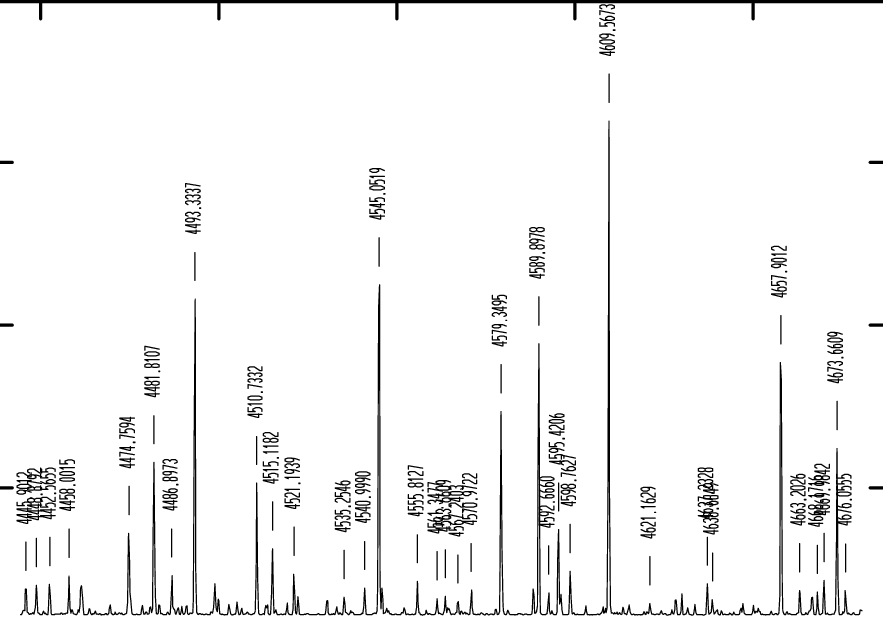

# **IMPORTANTE: Se debe hacer una reflexión respecto al eje x de los datos del espectro para que coincida con el espectro de calibración. Muy seguramente esto se deba aplicar al resto de las imágenes a analizar**

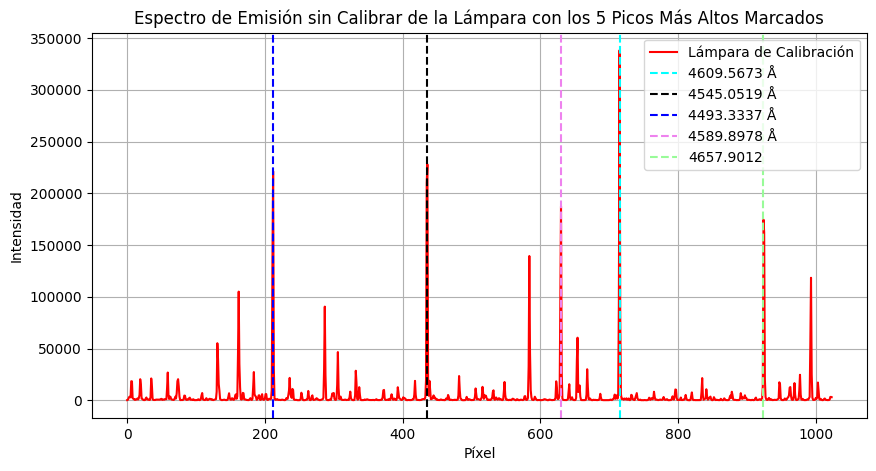

[212, 436, 630, 715, 924]


In [ ]:
from scipy.signal import argrelmax
lampara1D= np.sum(data, axis=1)
indices_picos = argrelmax(lampara1D, order=5)[0]
picos_altos = lampara1D[indices_picos]
sorted_indices = indices_picos[np.argsort(-picos_altos)]
posiciones_picos = sorted_indices[:5]  #5 primeros picos más altos

# Invertir  x
lampara1D_invertida = np.flip(lampara1D)

colores = ['aqua', 'black', 'blue', 'violet', 'palegreen']
labels = ['4609.5673 Å', '4545.0519 Å', '4493.3337 Å', '4589.8978 Å', '4657.9012']
plt.figure(figsize=(10, 5))
plt.title("Espectro de Emisión sin Calibrar de la Lámpara con los 5 Picos Más Altos Marcados")
plt.plot(lampara1D_invertida, label='Lámpara de Calibración', color='red')
plt.xlabel('Píxel')
plt.ylabel('Intensidad')
plt.grid(True)

pixeles=[]
for i, (pos, color, label) in enumerate(zip(posiciones_picos, colores, labels)):
    x= (len(lampara1D_invertida) - pos - 1)
    pixeles.append(x) #valores de pixeles para cada pico
    plt.axvline(x, color=color, linestyle='--', label=label)  # Restamos pos y restamos 1 por la inversión


plt.legend()
plt.show()

pixeles= sorted(pixeles)
print(pixeles)


In [ ]:
#Relación pixel/longitud de onda

wavelenghts= [4493.3337, 4545.0519, 4589.8978, 4609.5673, 4657.9012]

ratio=[]

for i in range(len(wavelenghts)):
  j = i+1
  if j <= 4:
    r= (wavelenghts[j]-wavelenghts[i])/(pixeles[j]-pixeles[i])
    ratio.append(r)

    ratio_sum = sum(ratio)
    angs_pixel = ratio_sum / len(ratio)

print("Factor de calibración (Å/píxel):", angs_pixel)


Factor de calibración (Å/píxel): 0.23117945404926016


In [ ]:

wavelenghts= [4493.3337, 4545.0519, 4589.8978, 4609.5673, 4657.9012]

ratio=[]

for i in range(len(wavelenghts)):
  j = i+1
  if j <= 4:
    r= (wavelenghts[j]-wavelenghts[i])/(pixeles[j]-pixeles[i])
    ratio.append(r)

    ratio_sum = sum(ratio)
    angs_pixel = ratio_sum / len(ratio)

print("Factor de calibración (Å/píxel):", angs_pixel)

Factor de calibración (Å/píxel): 0.23117945404926016


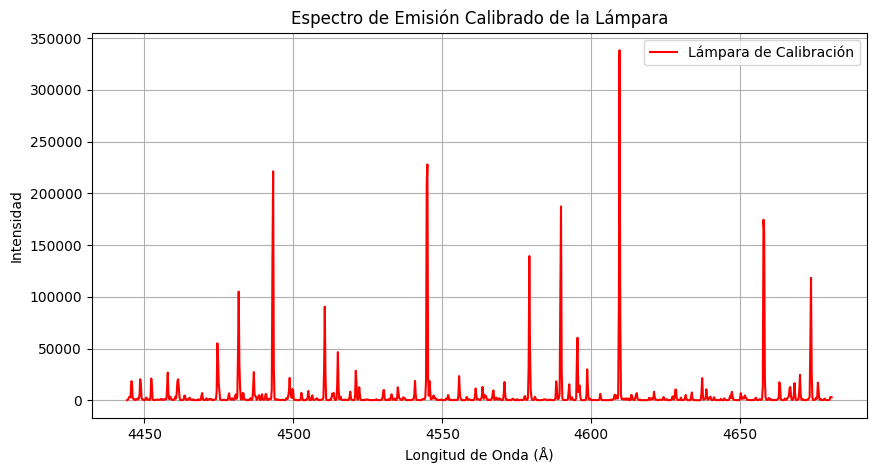

308

In [ ]:


factor_calibracion =angs_pixel
lampara1D = np.flip(np.sum(data, axis=1))

#factor de calibración a cada posición en píxeles
posiciones_calibradas = np.flip(np.arange(len(lampara1D)) * factor_calibracion + 4444.2012)


plt.figure(figsize=(10,5))
plt.title("Espectro de Emisión Calibrado de la Lámpara")
plt.plot(posiciones_calibradas, np.flip(lampara1D), label='Lámpara de Calibración', color='red')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad')
plt.grid(True)
plt.legend()
plt.show()
posiciones_picos[0]

In [ ]:
#Calibración de las demás imágenes de interés


#Imágenes a calibrar:
calibrar=[]

for i in range(len(names)):
  if names[i] == 'DHCep 6707' or names[i] == 'AHCep 6707':
    calibrar.append(files[i])
calibrar

['/content/drive/MyDrive/Proyecto Computacional/data/sp0020.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0024.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0023.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0022.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0021.fits',
 '/content/drive/MyDrive/Proyecto Computacional/data/sp0025.fits']

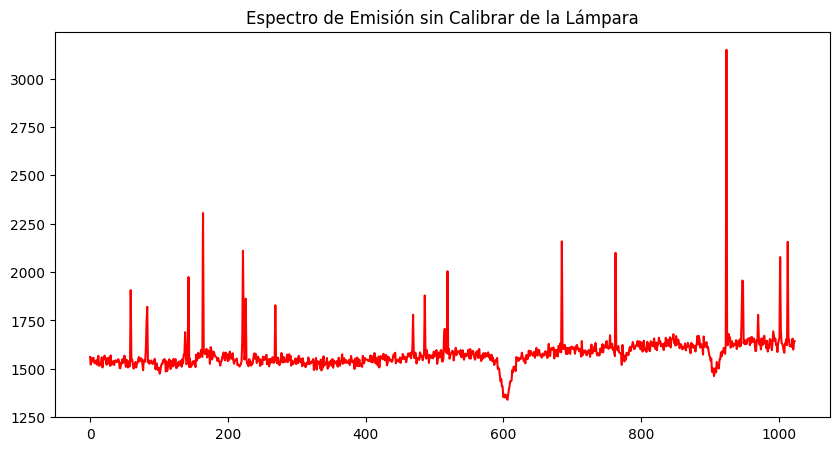

In [ ]:
lampara=  '/content/drive/MyDrive/Proyecto Computacional/data/sp0020.fits'
hdul = fits.open(lampara)
data = hdul[0].data
h1 = hdul[0].header


lampara1D= np.sum(data, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Espectro de Emisión sin Calibrar de la Lámpara")
plt.plot((lampara1D), label='Lámpara de Calibración', color='red')

In [ ]:
hdul.info()

Filename: /content/drive/MyDrive/Proyecto Computacional/data/sp0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (41, 1024)   float32   


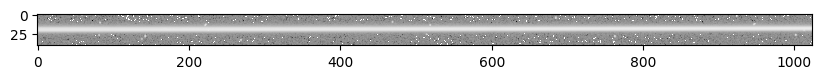

In [ ]:

fig9 = plt.figure(figsize=(10,15))
plt.imshow(data.T, cmap='gray',norm=LogNorm())
plt.grid(False)


In [ ]:
# Graficas sin calibrar

spectrum_2d=[]
spectrum_1d=[]
spectrum_calibrated=[]

#Generamos la imagen de los espectros en 2d, en 1d sin calibrar y calibrado
for i in calibrar:
  hdul = fits.open(i)
  data = hdul[0].data
  h1 = hdul[0].header
  spectrum_2d.append(data)

for j in spectrum_2d:
  spec= np.flip(np.sum(j, axis=1))
  spectrum_1d.append(spec)

for k in spectrum_1d:
  calibrated = (np.arange(len(k)) * factor_calibracion + 4444.2012)
  spectrum_calibrated.append(calibrated)

In [ ]:
spectrum_1d

[array([1642.5754, 1637.0944, 1599.7623, ..., 1555.0624, 1522.513 ,
        1560.9535], dtype=float32),
 array([5154.826 , 5202.9214, 5169.403 , ..., 4752.7827, 4687.4683,
        4668.144 ], dtype=float32),
 array([5593.6226, 5598.997 , 5590.7554, ..., 5076.6855, 5040.918 ,
        5019.1333], dtype=float32),
 array([1562.3767, 1564.0085, 1559.412 , ..., 1478.1682, 1464.1722,
        1504.9257], dtype=float32),
 array([1454.2263, 1478.2594, 1461.2247, ..., 1398.3713, 1366.2185,
        1361.8337], dtype=float32),
 array([4481.092 , 4499.361 , 4515.878 , ..., 4094.7512, 4156.7163,
        4122.8477], dtype=float32)]

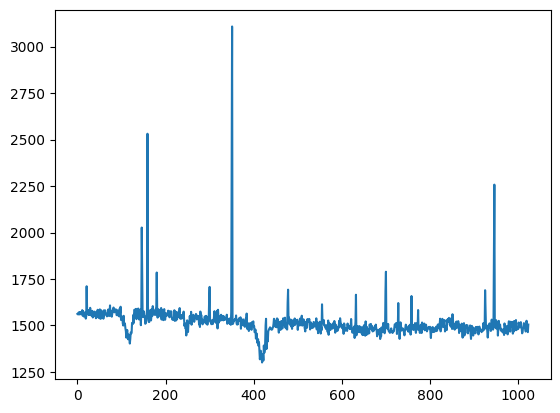

In [ ]:
plt.plot(spectrum_1d[3])

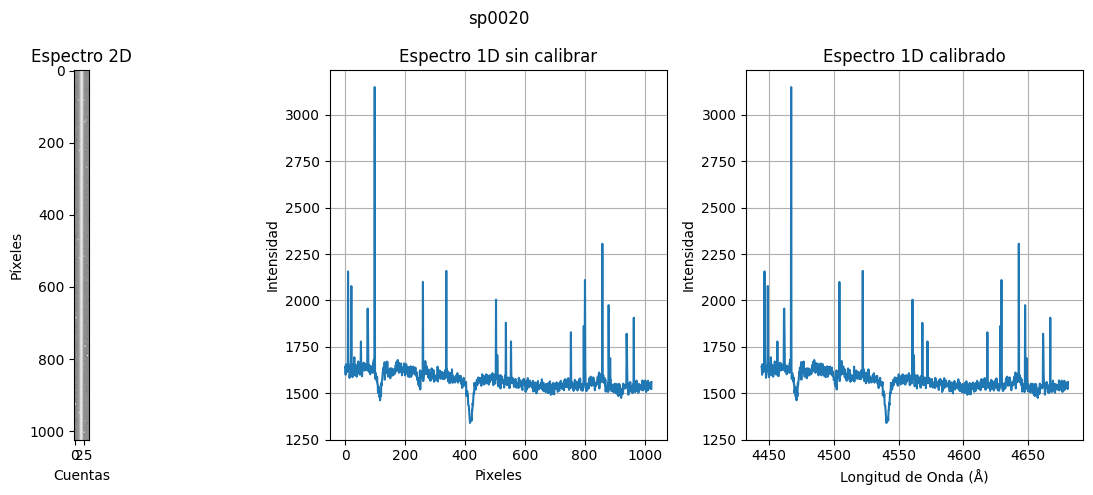

In [ ]:
#sp0020
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axs[0].imshow(spectrum_2d[0], cmap='gray',norm=LogNorm())
axs[0].set_title('Espectro 2D')
axs[0].set_xlabel('Cuentas')
axs[0].set_ylabel('Píxeles')
axs[0].grid(False)

axs[1].plot(spectrum_1d[0])
axs[1].set_title('Espectro 1D sin calibrar')
axs[1].set_xlabel('Pixeles')
axs[1].set_ylabel('Intensidad')
axs[1].grid(True)

axs[2].plot(spectrum_calibrated[0], spectrum_1d[0])
axs[2].set_title('Espectro 1D calibrado')
axs[2].set_xlabel('Longitud de Onda (Å)')
axs[2].set_ylabel('Intensidad')
axs[2].grid(True)

fig.suptitle('sp0020')
plt.tight_layout()

plt.show()


# **Parte 2: Determinación de la temperatura de las estrellas**
Luego del proceso de calibración de las imágenes se procederá a determinar la temperatura de las estrellas que emitieron ese espectro. Esto se hará usando dos técnicas diferentes: modelando la estrella como un cuerpo negro para determinar T usando la ley de Wien y a partir del ancho de la línea espectral.

In [ ]:
estrellas = glob("/content/drive/MyDrive/Proyecto Computacional/temperature/*.fits")
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/HD120315_c.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/HD137391_c.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/hr718.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/hr5501.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/hr9087.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/nova_arc.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/spectrclashr9087.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/hr8634.fits')
estrellas.remove( '/content/drive/MyDrive/Proyecto Computacional/temperature/nova.fits')

estrellas

['/content/drive/MyDrive/Proyecto Computacional/temperature/HD134083_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD130109_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD116842_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD6301_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/aspectrclashr9087.fits.3001.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/aspectrclashr9087.fits.2001.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD153751_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD196867_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HR262_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD198550_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD4758_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD145675_c.fits',
 '/content/drive/MyDrive/Proyecto Com

In [ ]:
black_body=['/content/drive/MyDrive/Proyecto Computacional/temperature/HD134083_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD130109_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD4758_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD145675_c.fits',
 '/content/drive/MyDrive/Proyecto Computacional/temperature/HD196755_c.fits']

In [ ]:
import PyAstronomy
from PyAstronomy import pyasl



Máximo: 17562.6796875, Longitud de onda: 5631.599039754229 Å
Máximo: 4666.20654296875, Longitud de onda: 6720.790479223935 Å


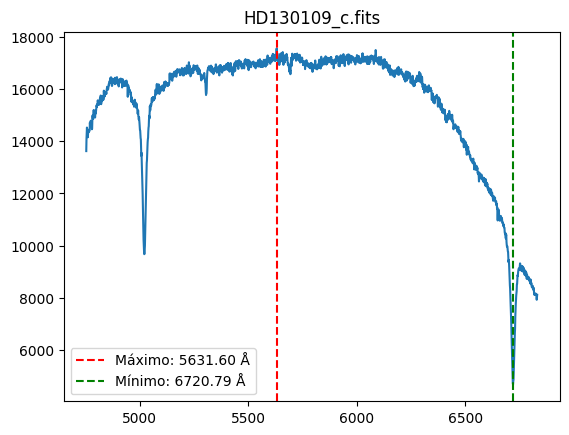

5631.599039754229 6720.790479223935
844 1892
angstroms/pixeles de las imágenes 1.0393048086542995


In [ ]:
#calibración
wvl, flx = pyasl.read1dFitsSpec("/content/drive/MyDrive/Proyecto Computacional/temperature/HD130109_c.fits")

plt.title("HD130109_c.fits")
plt.plot(np.flip(wvl), flx)

max_y = np.max(flx)
min_y = np.min(flx)

max_pos = np.argmax(flx)
min_pos = np.argmin(flx)

wave=[]

max_wavelength = np.flip(wvl)[max_pos]
min_wavelength = np.flip(wvl)[min_pos]
wave.append(max_wavelength)
wave.append(min_wavelength)

plt.axvline(x=max_wavelength, color='r', linestyle='--', label=f'Máximo: {max_wavelength:.2f} Å')
plt.axvline(x=min_wavelength, color='g', linestyle='--', label=f'Mínimo: {min_wavelength:.2f} Å')
plt.legend()
max_min_values = [(max_y, max_wavelength), (min_y, min_wavelength)]

for value in max_min_values:
    print(f"Máximo: {value[0]}, Longitud de onda: {value[1]} Å")

plt.show()

wvl=wvl.tolist()

pixel1= wvl.index(wave[0])
pixel2= wvl.index(wave[1])

ratio= (wave[1]-wave[0])/(pixel2-pixel1) #
print(wave[0], wave[1])
print(pixel1, pixel2)
print("angstroms/pixeles de las imágenes",ratio)

In [ ]:
estrella= '/content/drive/MyDrive/Proyecto Computacional/temperature/nova_arc.fits'
hdul = fits.open(estrella)
data = (hdul[0].data)
h1 = hdul[0].header


In [ ]:
h1

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                 1999 / length of data axis 1                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'M31_opt_trans'      / Title of the dataset                           
DATE    = '2007-04-23T09:39:53'/ file creation date (YYYY-MM-DDThh:mm:ss UT)    
ORIGIN  = 'Starlink Project, U.K.'/ Origin of this FITS file                    
BSCALE  =                  1.0 / True_value = BSCALE * FITS_value + BZERO       
BZERO   =                  0.0 / True_value = BSCALE * FITS_value + BZERO       
HDUCLAS1= 'NDF     '        

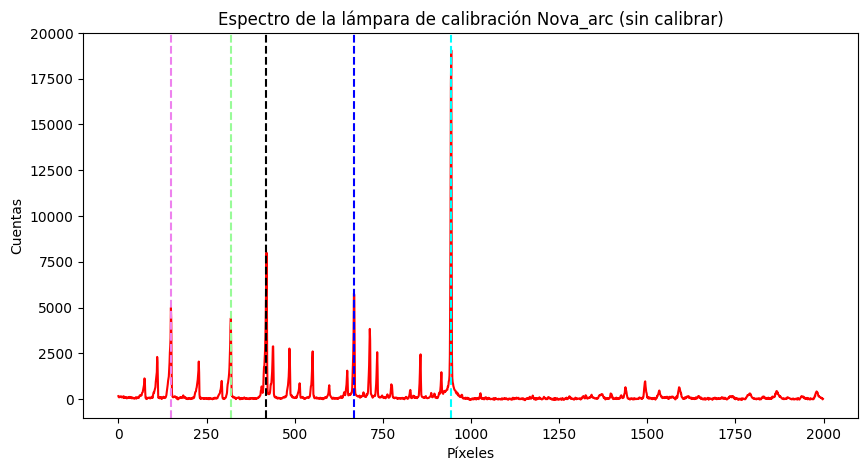

[149, 319, 420, 668, 944]


In [ ]:
from scipy.signal import argrelmax
pixeles=[]
#plt.colorbar(label='Intensidad del Espectro')

colores = ['aqua', 'black', 'blue', 'violet', 'palegreen']
labels = ['4609.5673 Å', '4545.0519 Å', '4493.3337 Å', '4589.8978 Å', '4657.9012']

indices_picos = argrelmax(data, order=5)[0]
picos_altos = data[indices_picos]
sorted_indices = indices_picos[np.argsort(-picos_altos)]
posiciones_picos = sorted_indices[:5]  #5 primeros picos más altos

plt.figure(figsize=(10,5))
plt.plot(np.flip(data), color='r')
plt.title('Espectro de la lámpara de calibración Nova_arc (sin calibrar)')
plt.xlabel('Píxeles')
plt.ylabel('Cuentas')

for i, (pos, color, labe) in enumerate(zip(posiciones_picos, colores, labels)):
    x= (len(data) - pos - 1)
    pixeles.append(x) #valores de pixeles para cada pico
    plt.axvline(x, color=color, linestyle='--', label=labe)
plt.show()
pixeles= sorted(pixeles)
print(pixeles)

Se suponía que estos datos ya estarían calibrados, pero no fue ese el caso. Temporalmente asumiré que la calibración para estos espectros es la misa que se calculó anteriormente, esto para continuar trabajando. Cuando tenga acceso a los datos de calibración reales se corregirá esto.![wien.png](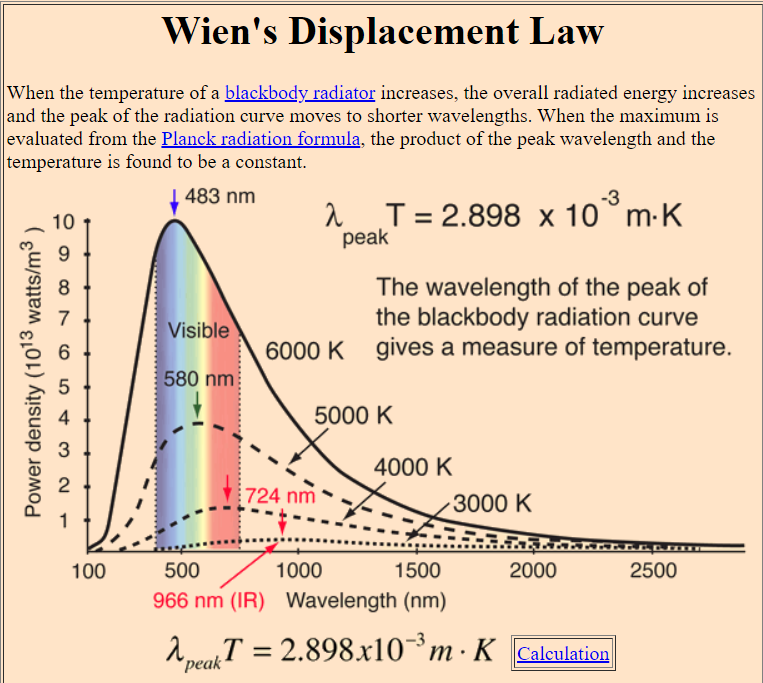![cal.png](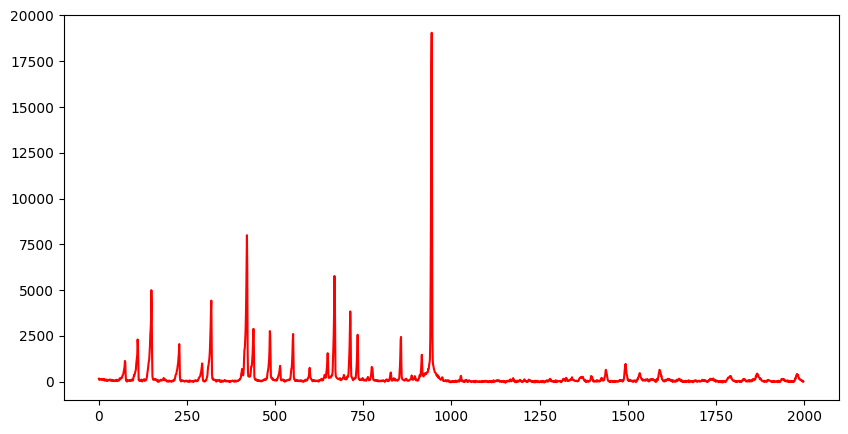![v6.png](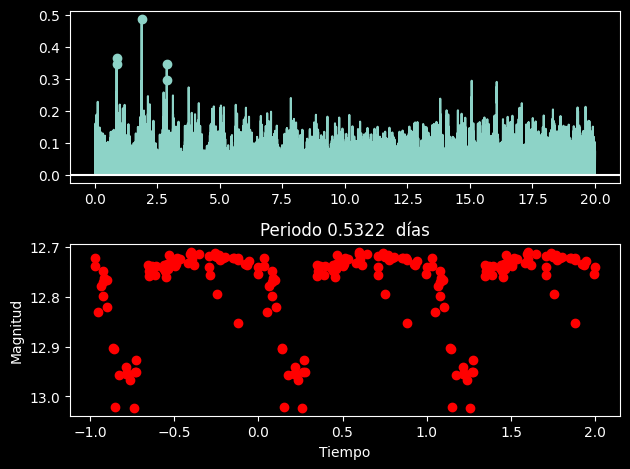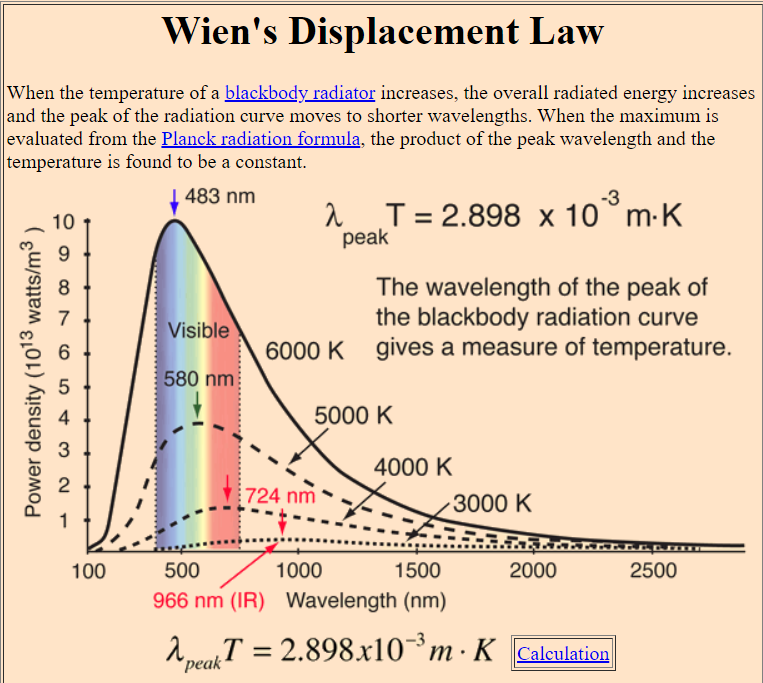)))

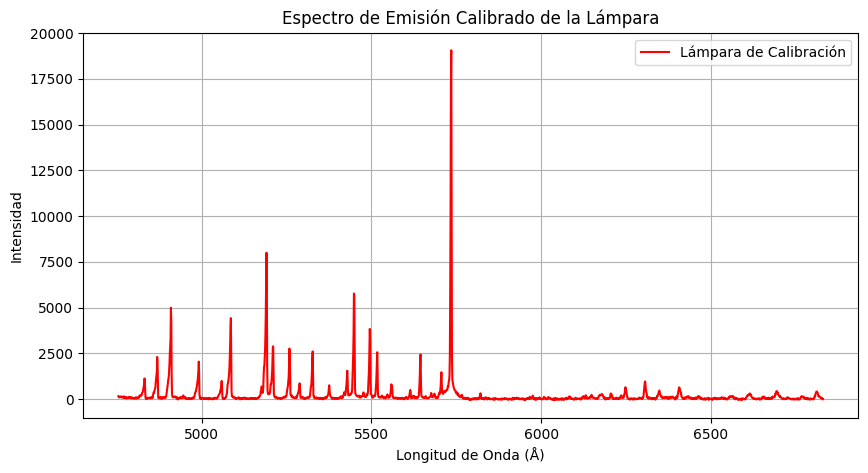

[4909.065033643846, 5085.746851115076, 5190.7166367891605, 5448.464229335427, 5735.312356524014]


In [ ]:
# Calibración teniendo en cuenta los parámetros anteriores:
desfase= 5792.474121 -(999*ratio)
lampara1D = np.flip(data)

posiciones_calibradas = np.flip(np.arange(len(lampara1D)) * ratio + desfase)


plt.figure(figsize=(10,5))
plt.title("Espectro de Emisión Calibrado de la Lámpara")
plt.plot(np.flip(posiciones_calibradas), (lampara1D), label='Lámpara de Calibración', color='red')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad')
plt.grid(True)
plt.legend()
plt.show()
pixeles_calibrados=[]
for i in pixeles:
  long= i* ratio + desfase
  pixeles_calibrados.append(long)
print(pixeles_calibrados)

**Parte A:**
- Estimación de la resolución espectral del espectrografo
Para esto se va a obtener el FWHM promedio de las 5 líneas espectrales mas fuertes del espectro. Si estuviera calibrado obtendríamos los datos necesarios en longitud de onda, pero como no es el caso se obtendrá en píxeles.

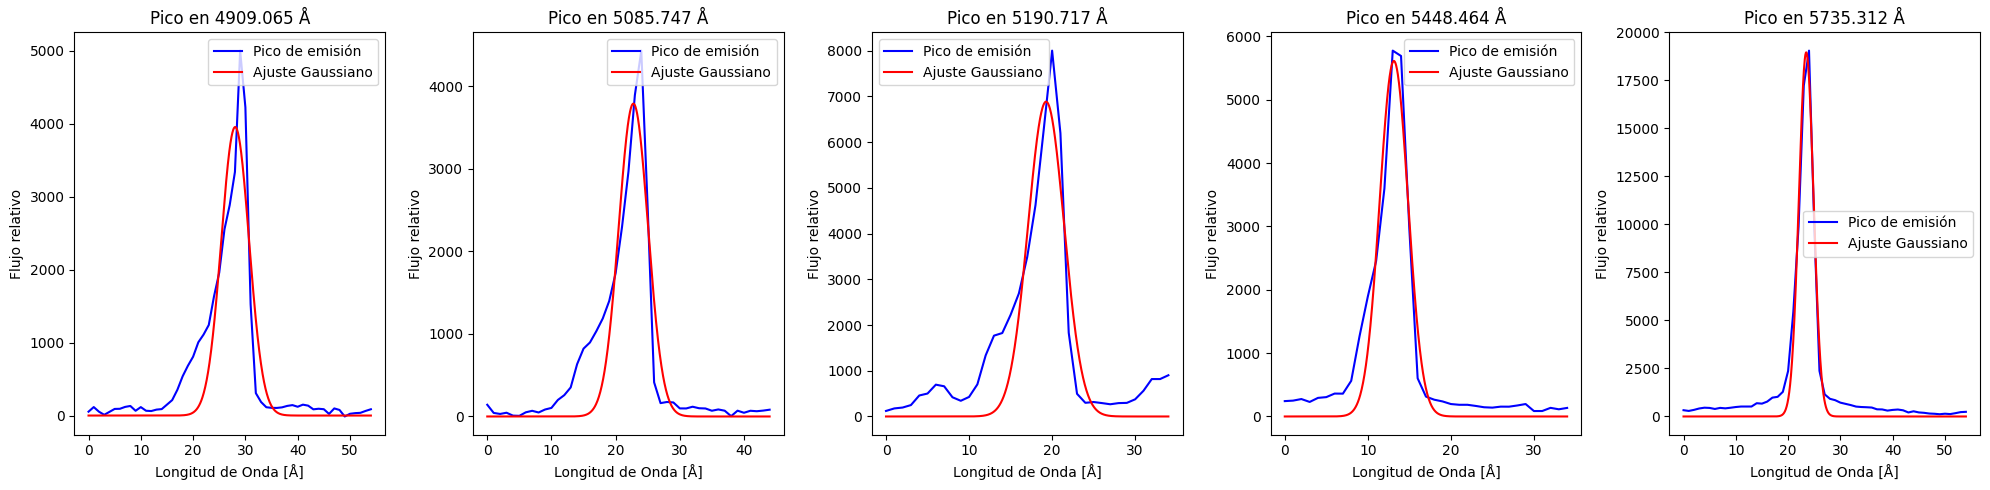

FWHM píxeles: [8.868710374761928, 7.617010625789936, 7.2477957881597845, 5.699705037820881, 4.6476638975416575]
FWHM angstroms: [9.217293339052347, 7.9163957709543755, 7.532669014778843, 5.923730853718378, 4.830339437724028]
FWHM promedio:  6.816177144814837 píxeles
FWHM promedio:  7.084085683245594 Angstrom
Posición en angstrom de los picos de emisión:  [4909.065033643846, 5085.746851115076, 5190.7166367891605, 5448.464229335427, 5735.312356524014]


In [ ]:

estrella = '/content/drive/MyDrive/Proyecto Computacional/temperature/nova_arc.fits'
hdul = fits.open(estrella)
data = hdul[0].data
data = np.flip(data)
sections = [
    data[120:175],
    data[295:340],
    data[400:435],
    data[655:690],
    data[920:975]
]
fwhm_list = []

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c)**2)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, section in enumerate(sections):
    x = np.arange(len(section))
    popt, _ = curve_fit(gaussian, x, section, p0=[1, np.argmax(section), 1])
    a, b, c = popt
    x_curve = np.linspace(x.min(), x.max(), 1000)
    curve_fit_data = gaussian(x_curve, *popt)

    axs[i].plot(x, section, color='b', label='Pico de emisión')
    axs[i].plot(x_curve, curve_fit_data, color='r', label='Ajuste Gaussiano')
    axs[i].set_title(f'Pico en {round(pixeles_calibrados[i],3)} Å')
    axs[i].set_xlabel('Longitud de Onda [Å]')
    axs[i].set_ylabel('Flujo relativo')
    axs[i].legend()

    fwhm = 2 * np.sqrt(2 * np.log(2)) * np.abs(c)
    fwhm_list.append(fwhm)

plt.tight_layout()
plt.show()


#FWHM de píxeles a Ångstroms
fwhm_wave1 = [i * ratio for i in fwhm_list]

print("FWHM píxeles:", fwhm_list)
print("FWHM angstroms:", fwhm_wave1)
print("FWHM promedio: ", np.mean(fwhm_list), "píxeles")
print("FWHM promedio: ", np.mean(fwhm_list) * ratio, "Angstrom")
print("Posición en angstrom de los picos de emisión: ", pixeles_calibrados)


In [ ]:
resolucion=[]
for i,j in zip(pixeles_calibrados, fwhm_wave1):
  r= i/j
  resolucion.append(r)
  r_pro= np.mean(resolucion)
print("Resolución del espectrometro: ", round(r_pro,3), "Å")

Resolución del espectrometro:  794.248 Å


**Ancho Equivalente y FWHM para las líneas de absorción del nova.fits**

In [ ]:
lampara= '/content/drive/MyDrive/Proyecto Computacional/temperature/nova.fits'
hdul = fits.open(lampara)
data = (hdul[0].data)
h1 = hdul[0].header

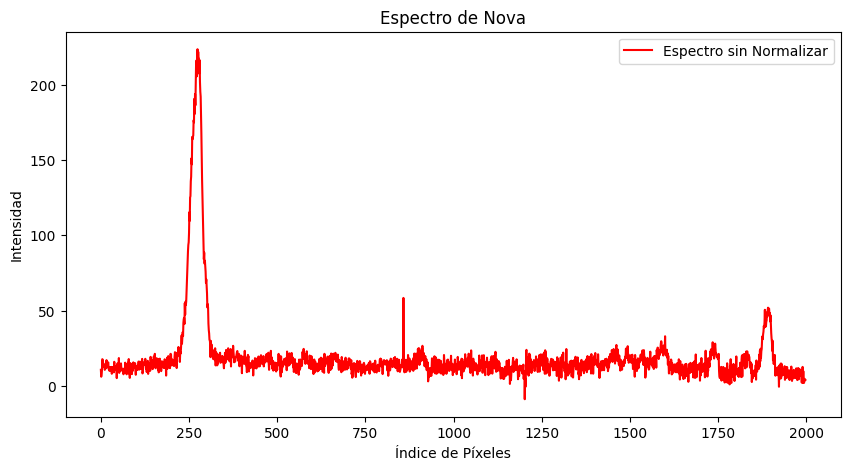

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.flip(data), label='Espectro sin Normalizar', color='red')
plt.xlabel('Índice de Píxeles')
plt.ylabel('Intensidad')
plt.title('Espectro de Nova')
plt.legend()
plt.show()

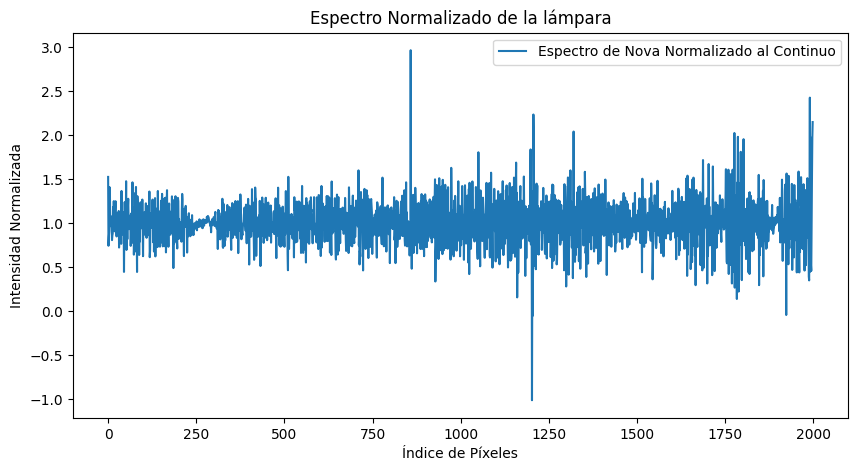

In [ ]:

window_size = 10
continuo = np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Paso 3: Aplicar la normalización
data_normalizado = data / continuo

# Paso 4: Visualizar el espectro normalizado
plt.figure(figsize=(10, 5))
#plt.plot(np.flip(data), label='Nova spectrum', color='red')
plt.plot(np.flip(data_normalizado), label='Espectro de Nova Normalizado al Continuo')
plt.xlabel('Índice de Píxeles')
plt.ylabel('Intensidad Normalizada')
plt.title('Espectro Normalizado de la lámpara')
plt.legend()
plt.show()

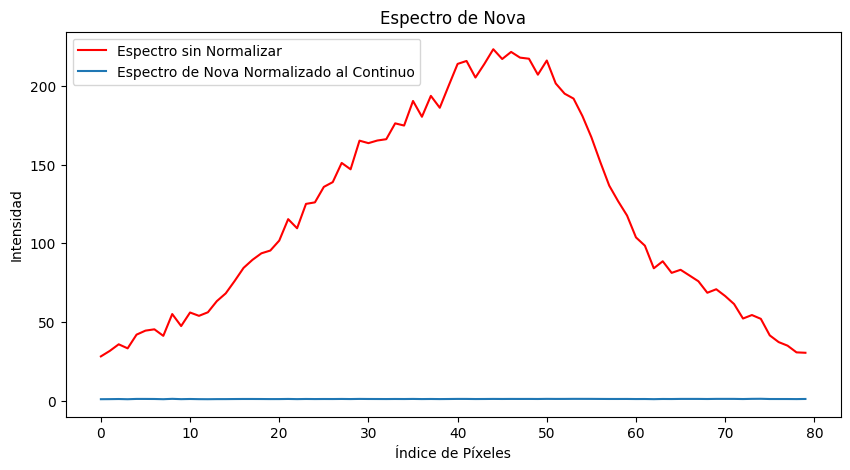

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.flip(data)[230:310], label='Espectro sin Normalizar', color='red')
plt.plot(np.flip(data_normalizado)[230:310], label='Espectro de Nova Normalizado al Continuo')
plt.xlabel('Índice de Píxeles')
plt.ylabel('Intensidad')
plt.title('Espectro de Nova')
plt.legend()
plt.show()

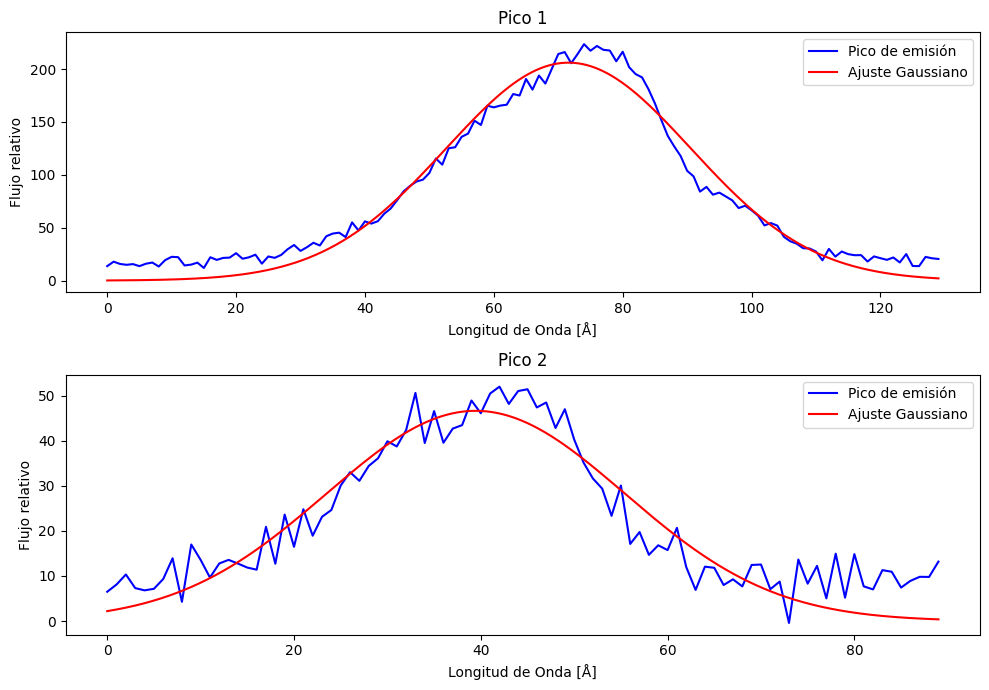

FWHM píxeles: [63.228740476255474, 53.168951063783645]
FWHM Ansgtrom: [65.71393402212706, 55.25874651169548]
EW píxeles: [80, 58]
EW Ansgtrom: [83.14438469234396, 60.279678901949374]
FWHM promedio:  58.19884577001956 píxeles
FWHM promedio:  60.48634026691127 Angstrom


In [ ]:
# FWHM para las e líneas espectrales visibles:
estrella= '/content/drive/MyDrive/Proyecto Computacional/temperature/nova.fits'
hdul = fits.open(estrella)
data = (hdul[0].data)
# Datos
data = np.flip(data)
sections = [
    data[200:330],
    data[1850:1940]
]  #Posición en píxeles donde se encuentran los picos de interés

# Lista para almacenar los FWHM
fwhm_list = []

#Función gausiana para los ajustes
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c)**2)

fig, axs = plt.subplots(2, 1, figsize=(10, 7))
for i, section in enumerate(sections):
    x = np.arange(len(section))

    # Ajuste de la curva
    popt, _ = curve_fit(gaussian, x, section, p0=[1, np.argmax(section), 1])
    a, b, c = popt
    x_curve = np.linspace(x.min(), x.max(), 1000)
    curve_fit_data = gaussian(x_curve, *popt)

    axs[i].plot(x, section, color='b', label='Pico de emisión')
    axs[i].plot(x_curve, curve_fit_data, color='r', label='Ajuste Gaussiano')
    axs[i].set_title(f'Pico {i+1}')
    axs[i].set_xlabel('Longitud de Onda [Å]')
    axs[i].set_ylabel('Flujo relativo')
    axs[i].legend()

    # Calcula el FWHM
    fwhm = 2 * np.sqrt(2 * np.log(2)) * np.abs(c)
    fwhm_list.append(fwhm)

plt.tight_layout()
plt.show()

fwhm_wave=[]
for i in fwhm_list:
  wave= i*ratio
  fwhm_wave.append(wave)

EW=[80, 58]
EW_wave= []
for i in EW:
  wave= i*ratio
  EW_wave.append(wave)

print("FWHM píxeles:", fwhm_list)
print("FWHM Ansgtrom:", fwhm_wave)
print("EW píxeles:", EW)
print("EW Ansgtrom:", EW_wave)
print("FWHM promedio: ", np.mean(fwhm_list), "píxeles")
print("FWHM promedio: ", np.mean(fwhm_list)*ratio, "Angstrom")


**Corrección de FWHM por el ensanchamiento
isntrumental: **
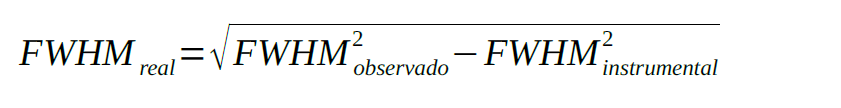


In [ ]:
#Corrección de FWHM por el ensanchamiento isntrumental:
fwhm_isntrumental=[]

for i in pixeles_calibrados:
  instr= i/r_pro
  fwhm_isntrumental.append(instr)

fwhm_real=[]
for i,j in zip(fwhm_wave1, fwhm_isntrumental):
  real= np.sqrt(np.abs(i**2 - j**2))
  fwhm_real.append(real)

print("FWHM Instrumental: ", fwhm_isntrumental)
print("FWHM sin corregir: ", fwhm_wave1)
print("FWHM corregido: ", fwhm_real)

FWHM Instrumental:  [6.180771299879027, 6.4032230089422635, 6.535385494915127, 6.859903282254439, 7.221060174615928]
FWHM sin corregir:  [9.217293339052347, 7.9163957709543755, 7.532669014778843, 5.923730853718378, 4.830339437724028]
FWHM corregido:  [6.837877056274884, 4.654896035373584, 3.7456426576840225, 3.4594343200283717, 5.367637372419279]


# **Estimación de la temperatura con la ley de Wien**
\\g

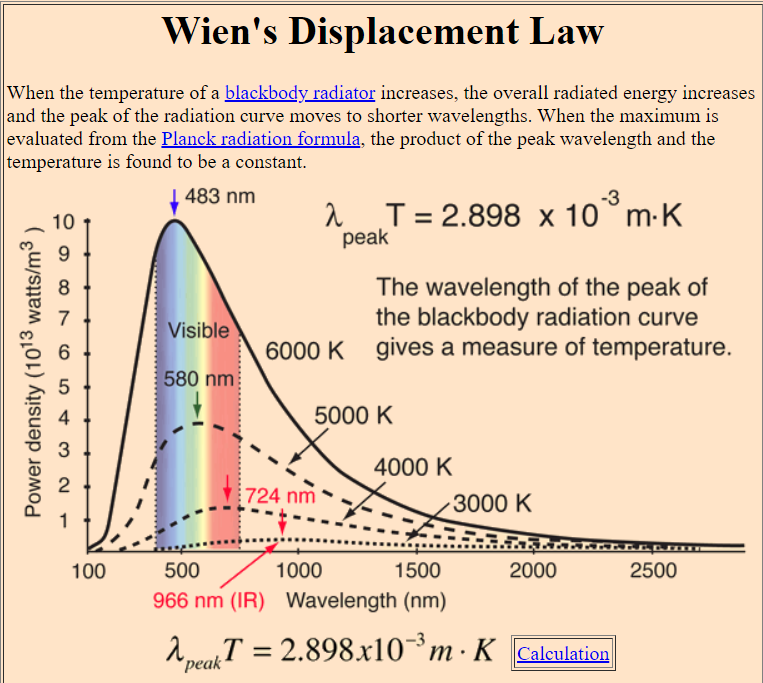![image.png]()

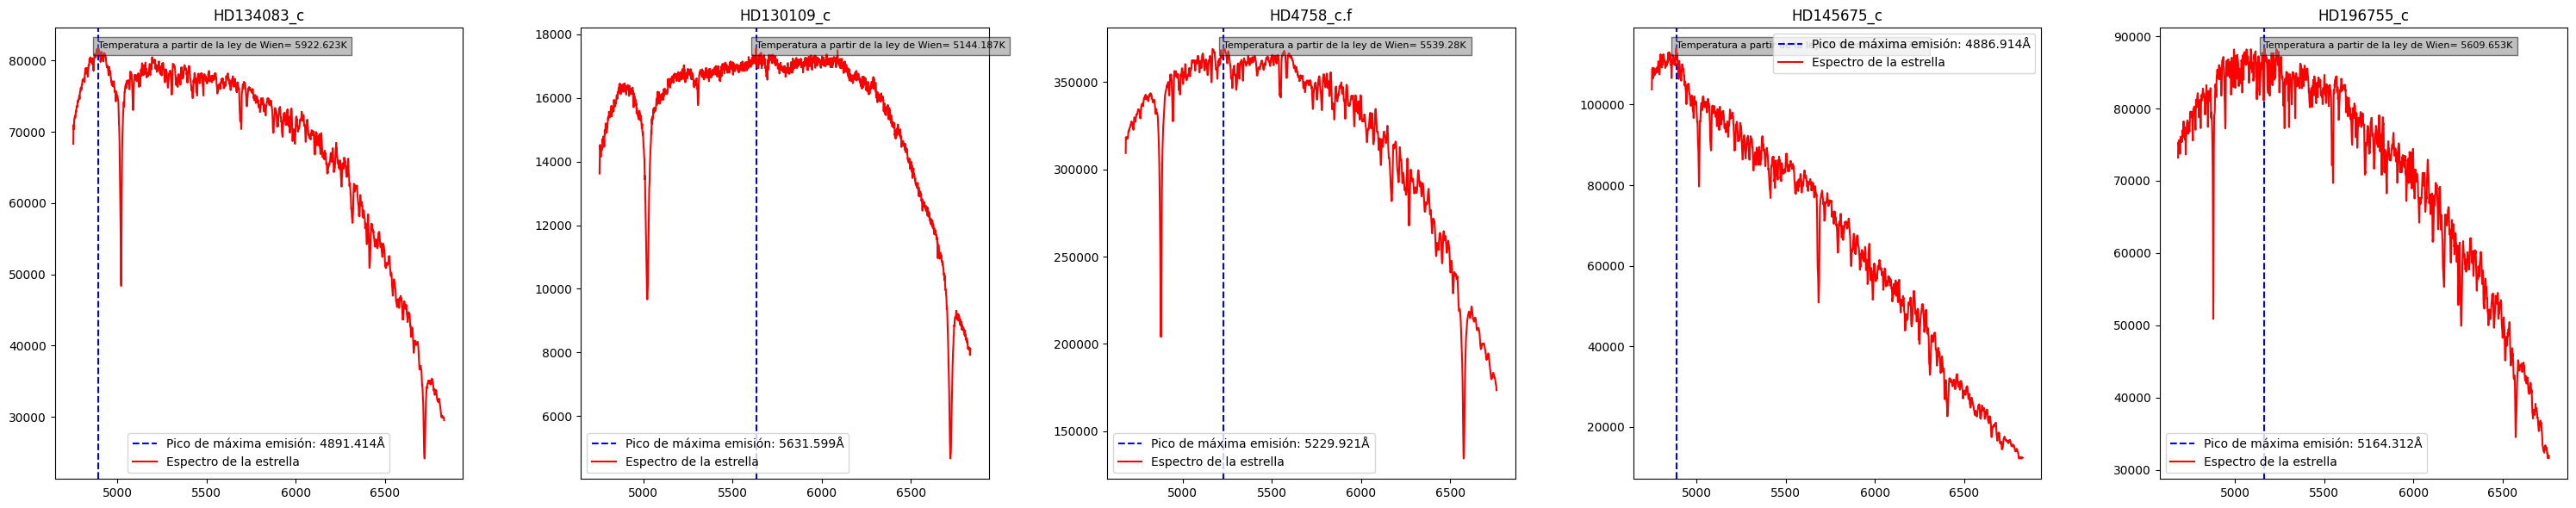

In [ ]:
num_estrellas = len(black_body)
plt.figure(figsize=(6*num_estrellas, 6))
nombres=[]
temperaturas = []
for i, estrella in enumerate(black_body):
    wvl, flx = pyasl.read1dFitsSpec(estrella)
    y = np.max(np.flip(flx))
    flx = np.flip(flx).tolist()
    pos = flx.index(y)
    pico = wvl[pos]

    # Calcular la temperatura usando la ley de Wien
    t = (2.897e-3)/(pico*1e-10)
    temperaturas.append(round(t, 3))
    texto = 'Temperatura a partir de la ley de Wien= ' + str(round(t, 3)) + 'K'
    nombres.append(estrella[58:68])
    # Crear la subparcela para cada estrella
    plt.subplot(1, num_estrellas, i+1)
    plt.title(estrella[58:68])
    plt.axvline(pico, color='b', linestyle='--', label="Pico de máxima emisión: "+str(round(pico, 3))+"Å")
    plt.plot(wvl, flx, color='r', label='Espectro de la estrella')
    plt.text(pico, y, texto, fontsize=8, color='black', bbox=dict(facecolor='gray', alpha=0.5))
    plt.legend()

plt.tight_layout()
plt.show()
#print(nombres)


In [ ]:
temperaturas

[5922.623, 5144.187, 5539.28, 5928.076, 5609.653]

<ipython-input-77-4720d38375d3>:7: RuntimeWarning: overflow encountered in exp
  intensity = a / (np.exp(b) - 1)


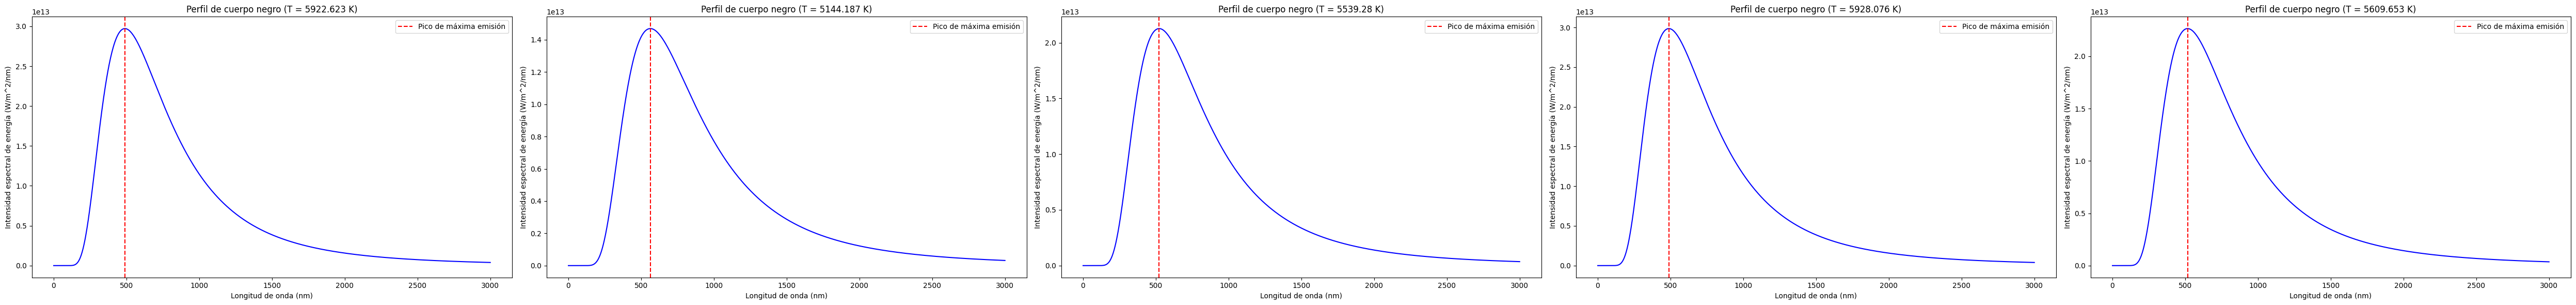

In [ ]:

h = 6.626e-34
c = 3.0e8
k = 1.38e-23
def planck(wavelength, temperature):
    a = 2 * h * c**2 / wavelength**5
    b = h * c / (wavelength * k * temperature)
    intensity = a / (np.exp(b) - 1)
    return intensity

lambda_range = np.linspace(1e-9, 3e-6, 1000)
temperaturas = [5922.623, 5144.187, 5539.28, 5928.076, 5609.653]

num_temperaturas = len(temperaturas)
num_columnas = num_temperaturas
plt.figure(figsize=(10*num_columnas, 6))

for i, temperatura in enumerate(temperaturas):
    intensidad = planck(lambda_range, temperatura)
    indice_pico = np.argmax(intensidad)
    lambda_pico = lambda_range[indice_pico]

    plt.subplot(1, num_columnas, i+1)
    plt.plot((lambda_range * 1e9), intensidad, color='b')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Intensidad espectral de energía (W/m^2/nm)')
    plt.axvline(x=lambda_pico * 1e9, color='r', linestyle='--', label= "Pico de máxima emisión")
    plt.title('Perfil de cuerpo negro (T = {} K)'.format(temperatura))
    plt.legend()
plt.tight_layout()
plt.show()


# **Estimación de la temperatura efectiva a partir de las líneas**

Se puede estimar la temperatura estelar mirando sólo ciertas longitudes de onda
del espectro. Uno de los mejores ejemplos de esta sensibilidad a la temperatura
llega mediante la comparación de las líneas de Balmer. La intensidad de estas
líneas en el espectro de una estrella es un excelente indicador de la temperatura
de la estrella. Pero surge un problema, estrellas de tipo muy temprano y muy tardío
pueden tener valores similares de ancho equivalente Hα (EW (Hα)). El
doblete del sodio Na en 5890-5896 Angstroms tiene un conocido comportamiento
en relación con el tipo espectral y clase de luminosidad.
Para aplicar este método se necesita conocer la relación entre la intensidad de la
línea Hα y la intensidad de las líneas de Na con a temperatura. Como una medida
de la intensidad de las líneas se utiliza el ancho equivalente.

Máximo: 17562.6796875, Longitud de onda: 5631.599039754229 Å
Máximo: 4666.20654296875, Longitud de onda: 6720.790479223935 Å


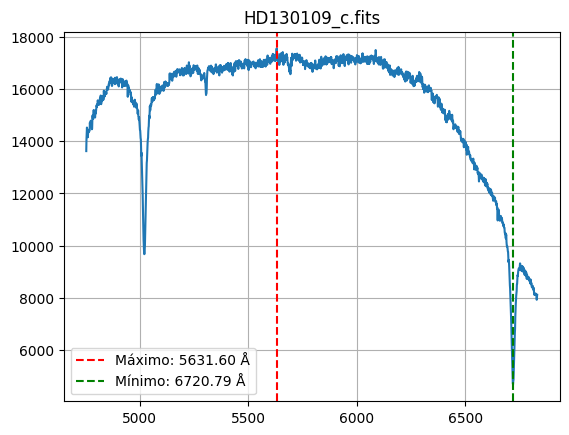

5631.599039754229 6720.790479223935
844 1892
angstroms/pixeles de las imágenes 1.0393048086542995


In [ ]:
#Graficamente:

wvl, flx = pyasl.read1dFitsSpec("/content/drive/MyDrive/Proyecto Computacional/temperature/HD130109_c.fits")

plt.title("HD130109_c.fits")
plt.plot(np.flip(wvl), flx)

max_y = np.max(flx)
min_y = np.min(flx)

max_pos = np.argmax(flx)
min_pos = np.argmin(flx)

wave=[]

max_wavelength = np.flip(wvl)[max_pos]
min_wavelength = np.flip(wvl)[min_pos]
wave.append(max_wavelength)
wave.append(min_wavelength)

plt.axvline(x=max_wavelength, color='r', linestyle='--', label=f'Máximo: {max_wavelength:.2f} Å')
plt.axvline(x=min_wavelength, color='g', linestyle='--', label=f'Mínimo: {min_wavelength:.2f} Å')
plt.grid(True)
plt.legend()
max_min_values = [(max_y, max_wavelength), (min_y, min_wavelength)]

for value in max_min_values:
    print(f"Máximo: {value[0]}, Longitud de onda: {value[1]} Å")

plt.show()

wvl=wvl.tolist()

pixel1= wvl.index(wave[0])
pixel2= wvl.index(wave[1])

ratio= (wave[1]-wave[0])/(pixel2-pixel1) #
print(wave[0], wave[1])
print(pixel1, pixel2)
print("angstroms/pixeles de las imágenes",ratio)


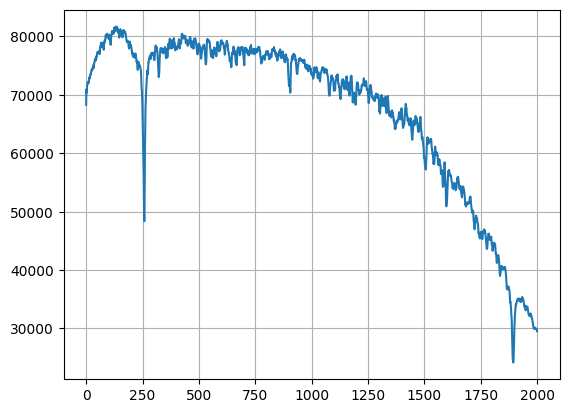

In [ ]:
estrella= '/content/drive/MyDrive/Proyecto Computacional/temperature/HD134083_c.fits'
hdul = fits.open(estrella)
data = (hdul[0].data)
# Datos
data = np.flip(data)
plt.plot(data)
plt.grid(True)


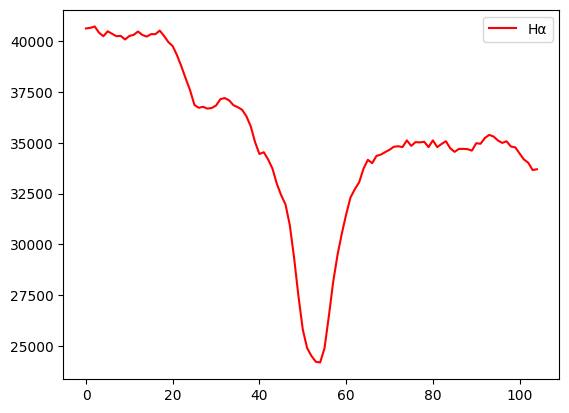

In [ ]:


plt.plot(data[1840:1945],color='r' ,label='Hα')
plt.legend()


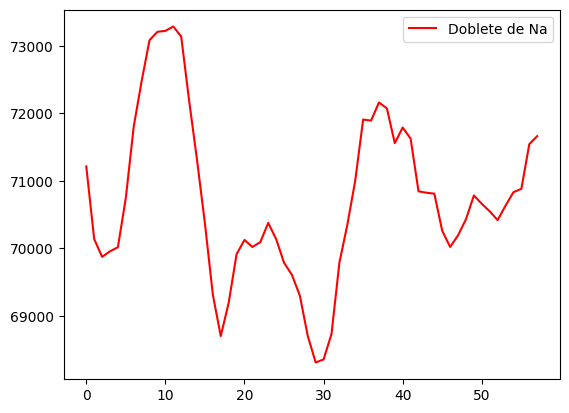

In [ ]:
plt.plot(data[1165:1223], color='r', label='Doblete de Na')
plt.legend()

In [ ]:
"""'""""""
recortes: HD134083_c: H_alpha: [1880:1910] ||| Na: [1175:1203]
          HD134083_c: H_alpha:[1870:1915]  ||| Na: [1175:1203]

"""

"'\nrecortes: HD134083_c: H_alpha: [1880:1910] ||| Na: [1175:1203]\n          HD134083_c: H_alpha:[1870:1915]  ||| Na: [1175:1203]\n\n"

In [ ]:
import math

# Constantes
lambda_Halpha = 6562.8  # Å
lambda_doblete_sodio = 5895.92  # Å
c = 3e8  # m/s
k = 1.38e-23  # J/K
m_H = 1.67e-27  # kg (masa del hidrógeno)
m_Na = 3.82e-26  # kg (masa del sodio)

# Temperaturas efectivas
temperaturas = [6500, 10240, 7500, 5300, 5650]

# Función para calcular el ancho equivalente
def calcular_ew(lambda_0, T, m):
    return (lambda_0**2 / c) * math.sqrt((2 * k * T * m) / m)

# Calcular los anchos equivalentes para Halpha y el doblete de sodio
EW_Halpha = [calcular_ew(lambda_Halpha, T, m_H) for T in temperaturas]
EW_doblete_sodio = [calcular_ew(lambda_doblete_sodio, T, m_Na) for T in temperaturas]

# Imprimir los resultados
print("Anchos equivalentes para Halpha:", EW_Halpha)
print("Anchos equivalentes para el doblete de sodio:", EW_doblete_sodio)


Anchos equivalentes para Halpha: [6.080906188117316e-11, 7.632408446409185e-11, 6.53194105342386e-11, 5.490976182849351e-11, 5.6693836781850467e-11]
Anchos equivalentes para el doblete de sodio: [4.9078708837639915e-11, 6.160081084678513e-11, 5.2718990095926764e-11, 4.431741141461589e-11, 4.575732994766995e-11]


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def linear_fit(x, y):
    # Definir la función lineal
    def model(x, a, b):
        return a * x + b

    # Utilizar curve_fit para ajustar el modelo a los datos
    popt, pcov = curve_fit(model, x, y)
    a, b = popt
    return a, b


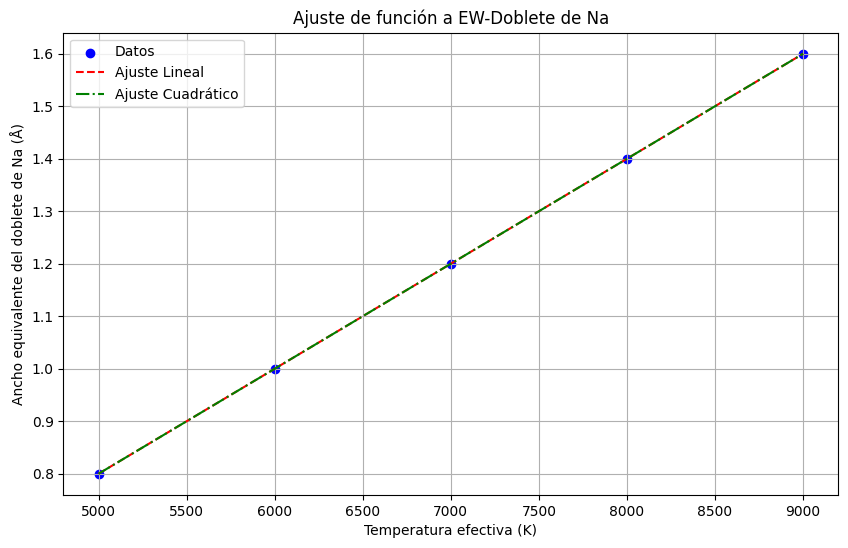

In [ ]:
# Ajuste lineal para el doblete de sodio
params_linear_Na, _ = curve_fit(linear_fit, temperaturas, EW_doblete_sodio)
a_linear_Na, b_linear_Na = params_linear_Na

# Ajuste cuadrático para el doblete de sodio
params_quadratic_Na, _ = curve_fit(quadratic_fit, temperaturas, EW_doblete_sodio)
a_quadratic_Na, b_quadratic_Na, c_quadratic_Na = params_quadratic_Na

# Generar datos para la curva ajustada del doblete de sodio
EW_linear_fit_Na = linear_fit(temperaturas_fit, a_linear_Na, b_linear_Na)
EW_quadratic_fit_Na = quadratic_fit(temperaturas_fit, a_quadratic_Na, b_quadratic_Na, c_quadratic_Na)

# Graficar los datos y las curvas ajustadas para el doblete de sodio
plt.figure(figsize=(10, 6))
plt.scatter(temperaturas, EW_doblete_sodio, label='Datos', color='blue')
plt.plot(temperaturas_fit, EW_linear_fit_Na, label='Ajuste Lineal', linestyle='--', color='red')
plt.plot(temperaturas_fit, EW_quadratic_fit_Na, label='Ajuste Cuadrático', linestyle='-.', color='green')
plt.xlabel('Temperatura efectiva (K)')
plt.ylabel('Ancho equivalente del doblete de Na (Å)')
plt.title('Ajuste de función a EW-Doblete de Na')
plt.legend()
plt.grid(True)
plt.show()


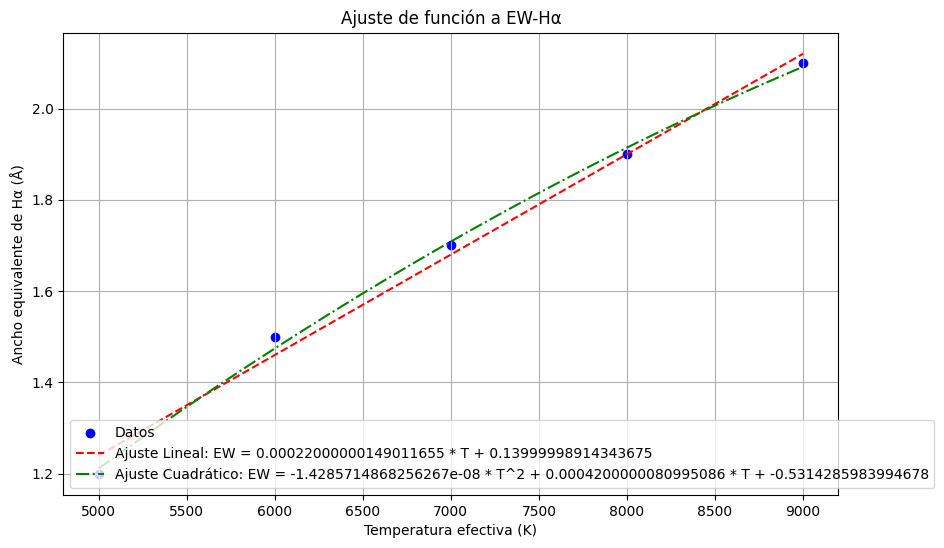

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de temperatura efectiva y ancho equivalente de Hα
temperaturas = np.array([5000, 6000, 7000, 8000, 9000])
EW_Halpha = np.array([1.2, 1.5, 1.7, 1.9, 2.1])

# Función de ajuste lineal (EW = a*T + b)
def linear_fit(T, a, b):
    return a * T + b

# Función de ajuste cuadrática (EW = a*T^2 + b*T + c)
def quadratic_fit(T, a, b, c):
    return a * T**2 + b * T + c

# Ajuste lineal
params_linear, _ = curve_fit(linear_fit, temperaturas, EW_Halpha)
a_linear, b_linear = params_linear

# Ajuste cuadrático
params_quadratic, _ = curve_fit(quadratic_fit, temperaturas, EW_Halpha)
a_quadratic, b_quadratic, c_quadratic = params_quadratic

# Generar datos para la curva ajustada
temperaturas_fit = np.linspace(min(temperaturas), max(temperaturas), 100)
EW_linear_fit = linear_fit(temperaturas_fit, a_linear, b_linear)
EW_quadratic_fit = quadratic_fit(temperaturas_fit, a_quadratic, b_quadratic, c_quadratic)

# Ecuaciones de ajuste
eq_linear = f'EW = {a_linear} * T + {b_linear}'
eq_quadratic = f'EW = {a_quadratic} * T^2 + {b_quadratic} * T + {c_quadratic}'

# Graficar los datos y las curvas ajustadas
plt.figure(figsize=(10, 6))
plt.scatter(temperaturas, EW_Halpha, label='Datos', color='blue')
plt.plot(temperaturas_fit, EW_linear_fit, label=f'Ajuste Lineal: {eq_linear}', linestyle='--', color='red')
plt.plot(temperaturas_fit, EW_quadratic_fit, label=f'Ajuste Cuadrático: {eq_quadratic}', linestyle='-.', color='green')
plt.xlabel('Temperatura efectiva (K)')
plt.ylabel('Ancho equivalente de Hα (Å)')
plt.title('Ajuste de función a EW-Hα')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Valores de anchos equivalentes de Hα y del doblete de sodio calculados
EW_Halpha_estrellas = [calcular_ew(lambda_Halpha, T, m_H) for T in temperaturas]
EW_doblete_sodio_estrellas = [calcular_ew(lambda_doblete_sodio, T, m_Na) for T in temperaturas]

# Funciones inversas de ajuste lineal
def inverse_linear_fit(EW, a, b):
    return (EW - b) / a

# Calcula las temperaturas para Hα y el doblete de sodio usando el ajuste lineal
T_estrellas_Halpha_linear = [inverse_linear_fit(EW, a_linear, b_linear) for EW in EW_Halpha_estrellas]
T_estrellas_doblete_sodio_linear = [inverse_linear_fit(EW, a_linear, b_linear) for EW in EW_doblete_sodio_estrellas]

# Función inversa de ajuste cuadrático
def inverse_quadratic_fit(EW, a, b, c):
    discriminant = b**2 - 4*a*(c - EW)
    T1 = (-b + math.sqrt(discriminant)) / (2 * a)
    T2 = (-b - math.sqrt(discriminant)) / (2 * a)
    # Devuelve la raíz positiva
    return T1 if T1 > 0 else T2

# Calcula las temperaturas para Hα y el doblete de sodio usando el ajuste cuadrático
T_estrellas_Halpha_quadratic = [inverse_quadratic_fit(EW, a_quadratic, b_quadratic, c_quadratic) for EW in EW_Halpha_estrellas]
T_estrellas_doblete_sodio_quadratic = [inverse_quadratic_fit(EW, a_quadratic, b_quadratic, c_quadratic) for EW in EW_doblete_sodio_estrellas]

# Imprime los resultados
print("Temperaturas para Hα usando ajuste lineal:", T_estrellas_Halpha_linear)
print("Temperaturas para el doblete de sodio usando ajuste lineal:", T_estrellas_doblete_sodio_linear)
print("Temperaturas para Hα usando ajuste cuadrático:", T_estrellas_Halpha_quadratic)
print("Temperaturas para el doblete de sodio usando ajuste cuadrático:", T_estrellas_doblete_sodio_quadratic)


Temperaturas para Hα usando ajuste lineal: [6573.791458923756, 10170.992904912255, 7619.528428367928, 5206.022216796931, 5619.664992221124]
Temperaturas para el doblete de sodio usando ajuste lineal: [3854.0762471257613, 6757.360674420412, 4698.085653888151, 2750.1561024177704, 3084.0052477558056]
Temperaturas para Hα usando ajuste cuadrático: [6505.211542622314, 10240.781482310202, 7495.04904602723, 5296.251362775552, 5652.718810206504]
Temperaturas para el doblete de sodio usando ajuste cuadrático: [4179.466980771846, 6674.490253759975, 4868.373875287389, 3315.695947869901, 3572.7625840069877]


fin
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************



---


# Ejercicio 1 (Irrelevante)

1.1: Desempaquetamiento de imágenes

In [ ]:
espectro= '/content/drive/MyDrive/Proyecto Computacional/data/sp0010.fits'



In [ ]:
hdul = fits.open(espectro)
data = hdul[0].data
h1 = hdul[0].header


In [ ]:
data

In [ ]:
h1

In [ ]:
#Espectro preliminar
from matplotlib.colors import LogNorm

fig9 = plt.figure()
plt.imshow(data.T, cmap='viridis',norm=LogNorm())
plt.grid(False)

In [ ]:
obj_name = h1.get('OBJECT', 'Unknown')
obj_name

In [ ]:
print(data.shape)
#Traspuesta de los datos para que el espectro salga a lo largo del eje x
#data= data.T

In [ ]:
plt.imshow(data.T, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Intensidad del Espectro')

plt.title('Espectro Estelar 2D (data transpuesta)')
plt.show()


In [ ]:
archivos = glob(espectro)
imagen = [fits.getdata(i) for i in archivos]

In [ ]:
!pip install specutils

In [ ]:
#Convertir el espectro de 2d a 1d

spectrum_1d = np.sum(data.T, axis=0)

# Mostrar una gráfica del espectro 1D
plt.plot(spectrum_1d)
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo relativo')
plt.title('Espectro Estelar 1D')
plt.show()



**Normalización del espectro a partir de su continuo**

In [ ]:

from astropy.modeling import models, fitting
from scipy.signal import savgol_filter

longitudes_de_onda = np.linspace(0, 140, len(spectrum_1d))
continuo_fit = savgol_filter(spectrum_1d, 51, 3)

plt.figure(figsize=(10, 5))
plt.plot(longitudes_de_onda, spectrum_1d, label='Espectro Original', color='blue')
plt.plot(longitudes_de_onda, continuo_fit, label='Línea de Normalización', color='red')
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo relativo')
plt.title('Espectro Estelar 1D con Línea de Normalización')
plt.legend()
plt.grid(True)
plt.xlim(longitudes_de_onda[0], longitudes_de_onda[-1])  # Ajustar los límites de los ejes x
plt.tight_layout()  # Mejorar el diseño de la gráfica
plt.show()


In [ ]:
###################################################
####Duda: Cómo generar un espectro sintético#######
###################################################


In [ ]:
# Gráfica del espectro dividido entre la línea de normalización (sirve para disminuir errores debidos al ruido)
# El ajuste se hace restando al espectro original el continuo

espectro_corregido= continuo_fit/spectrum_1d

plt.figure(figsize=(10, 5))
plt.plot(longitudes_de_onda, espectro_corregido, label='Espectro Normalizado', color='orangered')
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo relativo')
plt.title('Espectro ajustado respecto a su continuo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo del ancho de la linea espectral y zoom en la zona de la línea espectral
from scipy.optimize import curve_fit


maximo= np.max(espectro_corregido) #calcula el punto máximo de la lista de espectro, esto nos ubica en la línea espectral de interés
posicion_maximo = np.argmax(espectro_corregido)
maxim_location= longitudes_de_onda[posicion_maximo]


"""def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

popt, pcov = curve_fit(gaussian, longitudes_de_onda[90:110], espectro_corregido[90:110], p0=[np.max(espectro_corregido), 2, 1])
# Trazar una línea vertical en el punto del máximo absoluto
p0 = [np.max(espectro_corregido), maxim_location, 1]"""
plt.figure(figsize=(10, 5))
plt.plot(longitudes_de_onda[90:110], espectro_corregido[90:110], label='Espectro Normalizado', color='orangered')
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo relativo')
plt.title('Espectro ajustado respecto a su continuo')
plt.axvline(x=longitudes_de_onda[posicion_maximo], color='b', linestyle='--', label='Máximo= 107.121')
#plt.scatter(longitudes_de_onda[90:110], espectro_corregido[90:110], label='Datos con ruido')
#plt.plot(longitudes_de_onda[90:110], gaussian(longitudes_de_onda[90:110], *popt), color='blue', label='Ajuste gaussiano')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
len( espectro_corregido[90:110])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supongamos que ya tienes definidas las variables espectro_corregido y longitudes_de_onda

maximo = np.max(espectro_corregido)
posicion_maximo = np.argmax(espectro_corregido)
maxim_location = longitudes_de_onda[posicion_maximo]

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Ajuste gaussiano a la región cercana al pico
popt, pcov = curve_fit(gaussian, longitudes_de_onda[90:110], espectro_corregido[90:110], p0=[np.max(espectro_corregido), maxim_location, 1])

# Obtén el parámetro sigma del ajuste
ancho_linea_espectral = popt[2]

print("Ancho de la línea espectral:", ancho_linea_espectral)

plt.figure(figsize=(10, 5))
plt.plot(longitudes_de_onda[90:110], espectro_corregido[90:110], label='Espectro Normalizado', color='orangered')
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo relativo')
plt.title('Espectro ajustado respecto a su continuo')
plt.axvline(x=longitudes_de_onda[posicion_maximo], color='b', linestyle='--', label='Máximo= 107.121')
plt.legend()
plt.grid(True)
plt.show()


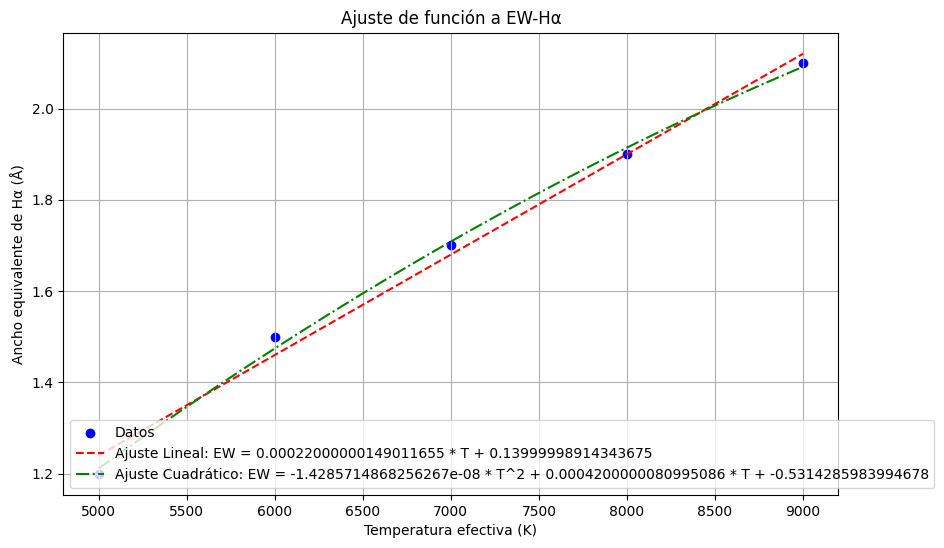